In [ ]:
!pip install levenshtein
from IPython.display import clear_output
clear_output()

In [ ]:
import os
import pandas as pd
from Levenshtein import distance

## Cargar datos

In [ ]:
data_dir = "/content/drive/Shareddrives/Estudio Ecosistema CTCI/PT2_Sistematización fuentes de información/Análisis/ANID_CORFO/Datos/CORFO"
results_dir = "/content/drive/Shareddrives/Estudio Ecosistema CTCI/PT2_Sistematización fuentes de información/Análisis/ANID_CORFO/Resultados/CORFO"

In [ ]:
df_institutions = pd.read_excel(os.path.join(results_dir, "data_instituciones_corfo.xlsx"))
df_institutions["rut"] = df_institutions["rut"].astype(str)
df_institutions

,rut,rut_dv,nombre,empresa_tipo,empresa_subtipo,provincia,comuna,tipo_institucion_final
0,77155166,77155166-1,REBORN ELECTRIC MOTORS SPA,PERSONA JURIDICA COMERCIAL,SOCIEDAD POR ACCIONES,CACHAPOAL,RANCAGUA,Empresa
1,76415846,76415846-6,CONSULTORIAS Y SERVICIOS MINEROS INTEGRALES LI...,PERSONA JURIDICA COMERCIAL,SOC. RESPONSABILIDAD LIMITADA,EL LOA,COPIAPO,Empresa
2,76055501,76055501-0,QIN TECHNOLOGY SPA.,PERSONA JURIDICA COMERCIAL,SOCIEDAD POR ACCIONES,SANTIAGO,LAS CONDES,Empresa
3,76940369,76940369-8,SEA GROUP SPA,PERSONA JURIDICA COMERCIAL,SOCIEDAD POR ACCIONES,SANTIAGO,PROVIDENCIA,Empresa
4,76772215,76772215-k,QUEMPIN SPA,PERSONA JURIDICA COMERCIAL,SOCIEDAD POR ACCIONES,VALPARAÍSO,VINA DEL MAR,Empresa
...,...,...,...,...,...,...,...,...
5073,77692848,77692848-8,MAHARO RAPA,NaN,NaN,NaN,NaN,Empresa
5074,8352508,8352508-8,JUSTO LORENZO GARCIA CAMPOS,NaN,NaN,NaN,NaN,Empresa
5075,13767547,13767547-1,PABLO LOPEZ URBINA,NaN,NaN,NaN,NaN,Empresa
5076,4335278,4335278-4,IRIS AVENDANO BRICENO,NaN,NaN,NaN,NaN,Empresa


In [ ]:
df_corfo = pd.read_excel(os.path.join(results_dir, "data_corfo_ruts_imputados.xlsx"))
df_corfo

,Unnamed: 0,id,año_adjudicacion,codigo,instrumento,tipo_relacion,titulo_del_proyecto,rutdv,nombre_razon_social,tipo_ctr_sii,rubro_sii,aprobado_corfo,aprobado_privado_total,aprobado_privado_pecuniario,monto_consolidado_ley,rut_normalizado,rut_valido,nombre_normalizado
0,0,1,2023.0,23CH-246113,Capital Humano,BENEFICIARIO / DESARROLLADOR,Nuevas estrategias de microencapsulación para ...,77131055-9,Liva Company SPA,PERSONA JURIDICA COMERCIAL,COMERCIO AL POR MAYOR Y AL POR MENOR; REPARACI...,30000000.0,3333334.0,3333334.0,NaN,77131055-9,True,LIVA COMPANY SPA
1,1,2,2023.0,23CH-246116,Capital Humano,BENEFICIARIO / DESARROLLADOR,Aprender haciendo bakeries de bajo índice glic...,77208333-5,ELAB. Y COM. CASONA EL MONTE LTDA,PERSONA JURIDICA COMERCIAL,INDUSTRIA MANUFACTURERA,29985000.0,7059200.0,4273200.0,NaN,77208333-5,True,ELAB Y COM CASONA EL MONTE LTDA
2,2,3,2023.0,23CH-246118,Capital Humano,BENEFICIARIO / DESARROLLADOR,Optimización de medios de cultivo sustentables...,77148405-0,LUYEF BIOTECHNOLOGIES CHILE SPA,PERSONA JURIDICA COMERCIAL,"ACTIVIDADES PROFESIONALES, CIENTIFICAS Y TECNICAS",30000000.0,3340000.0,3340000.0,NaN,77148405-0,True,LUYEF BIOTECHNOLOGIES CHILE SPA
3,3,4,2023.0,23CH-246123,Capital Humano,BENEFICIARIO / DESARROLLADOR,Producción de proteínas recombinantes a partir...,77065948-5,Pewman Innovation spa,PERSONA JURIDICA COMERCIAL,"AGRICULTURA, GANADERIA, SILVICULTURA Y PESCA",28500000.0,7800000.0,5400000.0,NaN,77065948-5,True,PEWMAN INNOVATION SPA
4,4,5,2023.0,23CH-246125,Capital Humano,BENEFICIARIO / DESARROLLADOR,NGB-eDNA. Plataforma genética no-invasiva para...,77063937-9,Ecología y Genética Ambiental SpA,PERSONA JURIDICA COMERCIAL,"ACTIVIDADES PROFESIONALES, CIENTIFICAS Y TECNICAS",30000000.0,3500000.0,3500000.0,NaN,77063937-9,True,ECOLOGIA Y GENETICA AMBIENTAL SPA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10566,10566,1344,NaN,PI-998,Ley I+D,mandante,Eficacia y toxicidad del uso de una familia de...,77424780-7,EWOS CHILE ALIMENTOS LIMITADA,PERSONA JURIDICA COMERCIAL,D - INDUSTRIAS MANUFACTURERAS NO METALICAS,NaN,NaN,NaN,76835703.0,77424780-7,True,EWOS CHILE ALIMENTOS LIMITADA
10567,10567,1345,NaN,PI-99869,Ley I+D,mandante,Análisis Proteómico por Machine-Learning: Perf...,76221912-3,LABORATORIO PATHOVET LIMITADA,PERSONA JURIDICA COMERCIAL,O - SERVICIOS SOCIALES Y DE SALUD,NaN,NaN,NaN,23076375.0,76221912-3,True,LABORATORIO PATHOVET LIMITADA
10568,10568,1346,NaN,PI-99871,Ley I+D,mandante,Desarrollo de un proceso de recubrimiento o lí...,76082953-6,NANOTEC S.A.,PERSONA JURIDICA COMERCIAL,"H - COMERCIO AL POR MAYOR Y MENOR, REP. VEH.AU...",NaN,NaN,NaN,19770000.0,76082953-6,True,NANOTEC SA
10569,10569,1347,NaN,PI-99872,Ley I+D,mandante,Nuevos usos de nanopartículas metálicas: Desar...,76082953-6,NANOTEC S.A.,PERSONA JURIDICA COMERCIAL,"H - COMERCIO AL POR MAYOR Y MENOR, REP. VEH.AU...",NaN,NaN,NaN,19800000.0,76082953-6,True,NANOTEC SA


## Juntar dataframes

In [ ]:
df_merged = df_corfo.merge(df_institutions, left_on="rut_normalizado", right_on="rut_dv", how="left")
df_merged


,Unnamed: 0,id,año_adjudicacion,codigo,instrumento,tipo_relacion,titulo_del_proyecto,rutdv,nombre_razon_social,tipo_ctr_sii,...,rut_valido,nombre_normalizado,rut,rut_dv,nombre,empresa_tipo,empresa_subtipo,provincia,comuna,tipo_institucion_final
0,0,1,2023.0,23CH-246113,Capital Humano,BENEFICIARIO / DESARROLLADOR,Nuevas estrategias de microencapsulación para ...,77131055-9,Liva Company SPA,PERSONA JURIDICA COMERCIAL,...,True,LIVA COMPANY SPA,77131055,77131055-9,LIVA COMPANY SPA,PERSONA JURIDICA COMERCIAL,SOCIEDAD POR ACCIONES,SANTIAGO,SANTIAGO,Empresa
1,1,2,2023.0,23CH-246116,Capital Humano,BENEFICIARIO / DESARROLLADOR,Aprender haciendo bakeries de bajo índice glic...,77208333-5,ELAB. Y COM. CASONA EL MONTE LTDA,PERSONA JURIDICA COMERCIAL,...,True,ELAB Y COM CASONA EL MONTE LTDA,77208333,77208333-5,ELABORADORA Y COMERCIALIZADORA CASONA EL MONTE...,PERSONA JURIDICA COMERCIAL,SOC. RESPONSABILIDAD LIMITADA,TALAGANTE,EL MONTE,Empresa
2,2,3,2023.0,23CH-246118,Capital Humano,BENEFICIARIO / DESARROLLADOR,Optimización de medios de cultivo sustentables...,77148405-0,LUYEF BIOTECHNOLOGIES CHILE SPA,PERSONA JURIDICA COMERCIAL,...,True,LUYEF BIOTECHNOLOGIES CHILE SPA,77148405,77148405-0,LUYEF BIOTECHNOLOGIES CHILE SPA,PERSONA JURIDICA COMERCIAL,SOCIEDAD POR ACCIONES,SANTIAGO,PROVIDENCIA,Empresa
3,3,4,2023.0,23CH-246123,Capital Humano,BENEFICIARIO / DESARROLLADOR,Producción de proteínas recombinantes a partir...,77065948-5,Pewman Innovation spa,PERSONA JURIDICA COMERCIAL,...,True,PEWMAN INNOVATION SPA,77065948,77065948-5,PEWMAN INNOVATION SPA,PERSONA JURIDICA COMERCIAL,SOCIEDAD POR ACCIONES,CHACABUCO,LAS CONDES,Empresa
4,4,5,2023.0,23CH-246125,Capital Humano,BENEFICIARIO / DESARROLLADOR,NGB-eDNA. Plataforma genética no-invasiva para...,77063937-9,Ecología y Genética Ambiental SpA,PERSONA JURIDICA COMERCIAL,...,True,ECOLOGIA Y GENETICA AMBIENTAL SPA,77063937,77063937-9,ECOLOGIA Y GENETICA AMBIENTAL SPA,PERSONA JURIDICA COMERCIAL,SOCIEDAD POR ACCIONES,CONCEPCIÓN,CONCEPCION,Empresa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10566,10566,1344,NaN,PI-998,Ley I+D,mandante,Eficacia y toxicidad del uso de una familia de...,77424780-7,EWOS CHILE ALIMENTOS LIMITADA,PERSONA JURIDICA COMERCIAL,...,True,EWOS CHILE ALIMENTOS LIMITADA,77424780,77424780-7,EWOS CHILE ALIMENTOS LIMITADA,PERSONA JURIDICA COMERCIAL,SOC. RESPONSABILIDAD LIMITADA,CONCEPCIÓN,CORONEL,Empresa
10567,10567,1345,NaN,PI-99869,Ley I+D,mandante,Análisis Proteómico por Machine-Learning: Perf...,76221912-3,LABORATORIO PATHOVET LIMITADA,PERSONA JURIDICA COMERCIAL,...,True,LABORATORIO PATHOVET LIMITADA,76221912,76221912-3,LABORATORIO PATHOVET LIMITADA,PERSONA JURIDICA COMERCIAL,SOC. RESPONSABILIDAD LIMITADA,LLANQUIHUE,PUERTO MONTT,Empresa
10568,10568,1346,NaN,PI-99871,Ley I+D,mandante,Desarrollo de un proceso de recubrimiento o lí...,76082953-6,NANOTEC S.A.,PERSONA JURIDICA COMERCIAL,...,True,NANOTEC SA,76082953,76082953-6,NANOTEC S.A.,PERSONA JURIDICA COMERCIAL,SOCIEDADES ANONIMAS CERRADAS,SANTIAGO,SAN BERNARDO,Empresa
10569,10569,1347,NaN,PI-99872,Ley I+D,mandante,Nuevos usos de nanopartículas metálicas: Desar...,76082953-6,NANOTEC S.A.,PERSONA JURIDICA COMERCIAL,...,True,NANOTEC SA,76082953,76082953-6,NANOTEC S.A.,PERSONA JURIDICA COMERCIAL,SOCIEDADES ANONIMAS CERRADAS,SANTIAGO,SAN BERNARDO,Empresa


## Análisis

Revisaremos los casos donde no hay `tipo_institucion_final`

In [ ]:
df_merged[df_merged["tipo_institucion_final"].isnull()]

,Unnamed: 0,id,año_adjudicacion,codigo,instrumento,tipo_relacion,titulo_del_proyecto,rutdv,nombre_razon_social,tipo_ctr_sii,...,rut_valido,nombre_normalizado,rut,rut_dv,nombre,empresa_tipo,empresa_subtipo,provincia,comuna,tipo_institucion_final
68,68,69,2023.0,23CVC-245689,Crea y Valida I+D+i Colaborativo,ENTIDAD COLABORADORA,Pretratamiento de celdas solares fotovoltaicas...,8823705-6,Manuel Ricardo San Martin Valdivia,NaN,...,True,MANUEL RICARDO SAN MARTIN VALDIVIA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
187,187,188,2023.0,23EURE-245956,Crea y Valida Eureka,ENTIDAD COLABORADORA,Desarrollo y evaluación de un proceso para la ...,NaN,Universidad de Vigo,NaN,...,False,UNIVERSIDAD DE VIGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
188,188,189,2023.0,23EURE-245956,Crea y Valida Eureka,ENTIDAD COLABORADORA,Desarrollo y evaluación de un proceso para la ...,NaN,ARTICA INGENIERÍA E INNOVACIÓN S.L.,NaN,...,False,ARTICA INGENIERIA E INNOVACION SL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
196,196,197,2023.0,23IAT-246199,Alta tecnología,ASOCIADO,Escalamiento y validación del proceso de recup...,NaN,"Ecometales Limited, Agencia en Chile",SOCIEDADES EXTRANJERAS,...,False,"ECOMETALES LIMITED, AGENCIA EN CHILE",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
206,206,207,2023.0,23IR-246344,Innova Región,BENEFICIARIO / DESARROLLADOR,Agua cervecera,77344475-7,Cervecería Rural SpA,NaN,...,True,CERVECERIA RURAL SPA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9224,9224,9225,2012.0,12SUP-15968,Startup (I),BENEFICIARIO / DESARROLLADOR,rhyboo s.a,21651777-6,JORGE ALBERTO RODRIGUEZ SUAREZ,NaN,...,True,JORGE ALBERTO RODRIGUEZ SUAREZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9225,9225,9226,2012.0,12SUP-15979,Startup (I),BENEFICIARIO / DESARROLLADOR,bcn school,14533316-4,FELIPE IGNACIO OLIVA LAZZERINI,NaN,...,True,FELIPE IGNACIO OLIVA LAZZERINI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9746,9746,521,NaN,PI-2417,Ley I+D,mandante,Desarrollo de una estación ERNC mixta Solar-Eó...,7029130-4,NaN,NaN,...,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10410,10410,1187,NaN,PI-527,Ley I+D,mandante,Obtención de variedades de Lupino (Lupinus Alb...,4255641-6,NaN,NaN,...,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


636 casos. Analicémoslos de acuerdo a la columna `tipo_ctr_sii`

In [ ]:
df_merged["tipo_ctr_sii"].unique()

array(['PERSONA JURIDICA COMERCIAL', 'INSTITUCIONES FISCALES',
       'ORG. SIN FINES DE LUCRO', nan, 'MUNICIPALIDADES',
       'SOCIEDADES EXTRANJERAS', 'SIN PER. JURIDICA'], dtype=object)

In [ ]:
df_merged.loc[(df_merged["tipo_institucion_final"].isnull()), "tipo_ctr_sii"].value_counts(dropna=False)

NaN                        634
SOCIEDADES EXTRANJERAS       1
ORG. SIN FINES DE LUCRO      1
Name: tipo_ctr_sii, dtype: int64

Una sociedad extranjera y una organización sin fines de lucro. Veamos la sociedad extranjera.

In [ ]:
df_merged.loc[(df_merged["tipo_institucion_final"].isnull())
              & (df_merged["tipo_ctr_sii"] == "SOCIEDADES EXTRANJERAS")]

,Unnamed: 0,id,año_adjudicacion,codigo,instrumento,tipo_relacion,titulo_del_proyecto,rutdv,nombre_razon_social,tipo_ctr_sii,...,rut_valido,nombre_normalizado,rut,rut_dv,nombre,empresa_tipo,empresa_subtipo,provincia,comuna,tipo_institucion_final
196,196,197,2023.0,23IAT-246199,Alta tecnología,ASOCIADO,Escalamiento y validación del proceso de recup...,NaN,"Ecometales Limited, Agencia en Chile",SOCIEDADES EXTRANJERAS,...,False,"ECOMETALES LIMITED, AGENCIA EN CHILE",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Le pondremos la categoría `Internacional`

In [ ]:
df_merged.loc[(df_merged["tipo_institucion_final"].isnull())
              & (df_merged["tipo_ctr_sii"] == "SOCIEDADES EXTRANJERAS"),
              "tipo_institucion_final"] = "Internacional"

Veamos ahora la organización sin fines de lucro

In [ ]:
df_merged.loc[(df_merged["tipo_institucion_final"].isnull()) &
              (df_merged["tipo_ctr_sii"] == "ORG. SIN FINES DE LUCRO")]

,Unnamed: 0,id,año_adjudicacion,codigo,instrumento,tipo_relacion,titulo_del_proyecto,rutdv,nombre_razon_social,tipo_ctr_sii,...,rut_valido,nombre_normalizado,rut,rut_dv,nombre,empresa_tipo,empresa_subtipo,provincia,comuna,tipo_institucion_final
527,527,528,2022.0,22CV-207273,Crea y Valida Rápida Implementación,ENTIDAD COLABORADORA,Desarrollo y validación de un novedoso snack r...,NaN,Centro Tecnológico para la innovación en alime...,ORG. SIN FINES DE LUCRO,...,False,CENTRO TECNOLOGICO PARA LA INNOVACION EN ALIME...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Le pondremos el tipo `Institución Privada Sin Fines de Lucro`

In [ ]:
df_merged.loc[(df_merged["tipo_institucion_final"].isnull()) &
              (df_merged["tipo_ctr_sii"] == "ORG. SIN FINES DE LUCRO"),
              "tipo_institucion_final"] = "Institución Privada Sin Fines de Lucro"

Revisemos de nuevo

In [ ]:
df_merged.loc[(df_merged["tipo_institucion_final"].isnull()), "tipo_ctr_sii"].value_counts(dropna=False)

NaN    634
Name: tipo_ctr_sii, dtype: int64

Ahora son 634 casos, para los que no tenemos categorización ni de `tipo_ctr_sii` (provisto por CORFO) ni `tipo_institucion_final` (obtenido por nosotros, vía cruce con otras bases de datos). No podemos hacer mucho en esos casos, así que lo dejaremos así.

### Verificación de coherencia entre tipo_ctr_sii y tipo_institucion_final

Es importante revisar que los datos en ambas columnas tengan sentido. Para eso, primero construiremos un mapeo de los `tipos_ctr_sii` a `tipo_institucion_final`.

In [ ]:
df_merged["tipo_ctr_sii"].unique()

array(['PERSONA JURIDICA COMERCIAL', 'INSTITUCIONES FISCALES',
       'ORG. SIN FINES DE LUCRO', nan, 'MUNICIPALIDADES',
       'SOCIEDADES EXTRANJERAS', 'SIN PER. JURIDICA'], dtype=object)

In [ ]:
df_merged["tipo_institucion_final"].unique()

array(['Empresa', 'Institución de Educación Superior',
       'Institución Privada Sin Fines de Lucro', 'Estado', nan,
       'Internacional', 'Otra'], dtype=object)

In [ ]:
map_inst_types = {
    "PERSONA JURIDICA COMERCIAL": "Empresa",
    "INSTITUCIONES FISCALES": "Estado",
    "ORG. SIN FINES DE LUCRO": "Institución Privada Sin Fines de Lucro",
    "MUNICIPALIDADES": "Estado",
    "SOCIEDADES EXTRANJERAS": "Internacional",
    "SIN PER. JURIDICA": "Otra"
}

#### Tipo SII: Persona Jurídica Comercial

In [ ]:
current_sii_type = "PERSONA JURIDICA COMERCIAL"
df_merged.loc[(df_merged["tipo_ctr_sii"] == current_sii_type) &
              (df_merged["tipo_institucion_final"] != map_inst_types[current_sii_type])]

,Unnamed: 0,id,año_adjudicacion,codigo,instrumento,tipo_relacion,titulo_del_proyecto,rutdv,nombre_razon_social,tipo_ctr_sii,...,rut_valido,nombre_normalizado,rut,rut_dv,nombre,empresa_tipo,empresa_subtipo,provincia,comuna,tipo_institucion_final
60,60,61,2023.0,23CVC-245655,Crea y Valida I+D+i Colaborativo,ENTIDAD COLABORADORA,Desarrollo de consorcio de levaduras nativas c...,81698900-0,Pontificia Universidad Catolica de Chile- FAIF,PERSONA JURIDICA COMERCIAL,...,True,PONTIFICIA UNIVERSIDAD CATOLICA DE CHILE- FAIF,81698900,81698900-0,PONTIFICIA UNIVERSIDAD CATOLICA DE CHILE,PERSONA JURIDICA COMERCIAL,SOC. RESPONSABILIDAD LIMITADA,SANTIAGO,SANTIAGO,Institución de Educación Superior
211,211,212,2023.0,23IR-246350,Innova Región,ENTIDAD COLABORADORA,Algamino un bioestimulante rico en aminoácidos...,81518400-9,Centro de investigacion y desarrollo tec....,PERSONA JURIDICA COMERCIAL,...,True,CENTRO DE INVESTIGACION Y DESARROLLO TEC,81518400,81518400-9,UNIVERSIDAD CATOLICA DEL NORTE,PERSONA JURIDICA COMERCIAL,SOC. RESPONSABILIDAD LIMITADA,ANTOFAGASTA,ANTOFAGASTA,Institución de Educación Superior
223,223,224,2023.0,23IR-246373,Innova Región,ENTIDAD COLABORADORA,Industrialización de viviendas sociales con mí...,81698900-0,PONTIFICIA UNIVERSIDAD CATOLICA DE CHILE,PERSONA JURIDICA COMERCIAL,...,True,PONTIFICIA UNIVERSIDAD CATOLICA DE CHILE,81698900,81698900-0,PONTIFICIA UNIVERSIDAD CATOLICA DE CHILE,PERSONA JURIDICA COMERCIAL,SOC. RESPONSABILIDAD LIMITADA,SANTIAGO,SANTIAGO,Institución de Educación Superior
254,254,255,2023.0,23IR-246492,Innova Región,ENTIDAD COLABORADORA,Desarrollo de una formulación nutracéutica con...,81518400-9,Universidad Católica del Norte,PERSONA JURIDICA COMERCIAL,...,True,UNIVERSIDAD CATOLICA DEL NORTE,81518400,81518400-9,UNIVERSIDAD CATOLICA DEL NORTE,PERSONA JURIDICA COMERCIAL,SOC. RESPONSABILIDAD LIMITADA,ANTOFAGASTA,ANTOFAGASTA,Institución de Educación Superior
574,574,575,2022.0,22CVC-206537,Crea y Valida I+D+i Colaborativo,ENTIDAD COLABORADORA,Desarrollo de un producto fungicida basado en ...,81698900-0,Pontificia Universidad Catolica de Chile- FAIF,PERSONA JURIDICA COMERCIAL,...,True,PONTIFICIA UNIVERSIDAD CATOLICA DE CHILE- FAIF,81698900,81698900-0,PONTIFICIA UNIVERSIDAD CATOLICA DE CHILE,PERSONA JURIDICA COMERCIAL,SOC. RESPONSABILIDAD LIMITADA,SANTIAGO,SANTIAGO,Institución de Educación Superior
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,8945,8946,2012.0,12PAE-17975,Apoyo Al Entorno Emprendedor,COEJECUTOR / CODESARROLLADOR,e-ship el barco de la innovación 1era travesía...,81698900-0,PONTIFICIA UNIVERSIDAD CATÓLICA DE CHILE,PERSONA JURIDICA COMERCIAL,...,True,PONTIFICIA UNIVERSIDAD CATOLICA DE CHILE,81698900,81698900-0,PONTIFICIA UNIVERSIDAD CATOLICA DE CHILE,PERSONA JURIDICA COMERCIAL,SOC. RESPONSABILIDAD LIMITADA,SANTIAGO,SANTIAGO,Institución de Educación Superior
8960,8960,8961,2012.0,12PDT-16196,Programas De Difusión Tecnológica,BENEFICIARIO / DESARROLLADOR,cómo incorporar a las revistas chilenas al mod...,80068100-6,ASOC NACIONAL DE LA PRENSA,PERSONA JURIDICA COMERCIAL,...,True,ASOC NACIONAL DE LA PRENSA,80068100,80068100-6,ASOC NACIONAL DE LA PRENSA,ORG. SIN FINES DE LUCRO,ASOC. GREMIAL,SANTIAGO,PROVIDENCIA,Institución Privada Sin Fines de Lucro
8961,8961,8962,2012.0,12PDT-16232,Programas De Difusión Tecnológica,BENEFICIARIO / DESARROLLADOR,transferencia tecnológica para el desarrollo d...,81518400-9,UNIVERSIDAD CATOLICA DEL NORTE,PERSONA JURIDICA COMERCIAL,...,True,UNIVERSIDAD CATOLICA DEL NORTE,81518400,81518400-9,UNIVERSIDAD CATOLICA DEL NORTE,PERSONA JURIDICA COMERCIAL,SOC. RESPONSABILIDAD LIMITADA,ANTOFAGASTA,ANTOFAGASTA,Institución de Educación Superior
9056,9056,9057,2012.0,12PTC-16644,Portafolios De Tecnologías Comercializables,BENEFICIARIO / DESARROLLADOR,portafolio de tecnologías comercializables de ...,81698900-0,PONTIFICIA UNIVERSIDAD CATÓLICA DE CHILE,PERSONA JURIDICA COMERCIAL,...,True,PONTIFICIA UNIVERSIDAD CATOLICA DE CHILE,81698900,8169

173 casos. Pero muchos parecen ser universidades, revisemos eso.

In [ ]:
current_sii_type = "PERSONA JURIDICA COMERCIAL"
df_merged.loc[(df_merged["tipo_ctr_sii"] == current_sii_type) &
              (df_merged["tipo_institucion_final"] != map_inst_types[current_sii_type]) &
              (~df_merged["nombre_normalizado"].str.contains("UNIVERSIDAD").astype(bool)),
              ["rut_dv", "nombre_normalizado", "nombre", "tipo_ctr_sii", "empresa_tipo", "tipo_institucion_final"]] \
         .sort_values(by="nombre_normalizado")

,rut_dv,nombre_normalizado,nombre,tipo_ctr_sii,empresa_tipo,tipo_institucion_final
8960,80068100-6,ASOC NACIONAL DE LA PRENSA,ASOC NACIONAL DE LA PRENSA,PERSONA JURIDICA COMERCIAL,ORG. SIN FINES DE LUCRO,Institución Privada Sin Fines de Lucro
3132,81458500-k,CAMARA CHILENA DE LA CONSTRUCCION,CAMARA CHILENA DE LA CONSTRUCCION A G,PERSONA JURIDICA COMERCIAL,ORG. SIN FINES DE LUCRO,Institución Privada Sin Fines de Lucro
4789,81458500-k,CAMARA CHILENA DE LA CONSTRUCCION,CAMARA CHILENA DE LA CONSTRUCCION A G,PERSONA JURIDICA COMERCIAL,ORG. SIN FINES DE LUCRO,Institución Privada Sin Fines de Lucro
6803,81458500-k,CAMARA CHILENA DE LA CONSTRUCCION,CAMARA CHILENA DE LA CONSTRUCCION A G,PERSONA JURIDICA COMERCIAL,ORG. SIN FINES DE LUCRO,Institución Privada Sin Fines de Lucro
6832,81458500-k,CAMARA CHILENA DE LA CONSTRUCCION,CAMARA CHILENA DE LA CONSTRUCCION A G,PERSONA JURIDICA COMERCIAL,ORG. SIN FINES DE LUCRO,Institución Privada Sin Fines de Lucro
6880,81458500-k,CAMARA CHILENA DE LA CONSTRUCCION,CAMARA CHILENA DE LA CONSTRUCCION A G,PERSONA JURIDICA COMERCIAL,ORG. SIN FINES DE LUCRO,Institución Privada Sin Fines de Lucro
7929,96986340-5,CENTRO DE FORMACION TECNICA TEODORO WICKEL KLU...,CENTRO DE FORMACION TECNICA TEODORO WICKEL KLU...,PERSONA JURIDICA COMERCIAL,PERSONA JURIDICA COMERCIAL,Institución de Educación Superior
8310,96986340-5,CENTRO DE FORMACION TECNICA TEODORO WICKEL KLU...,CENTRO DE FORMACION TECNICA TEODORO WICKEL KLU...,PERSONA JURIDICA COMERCIAL,PERSONA JURIDICA COMERCIAL,Institución de Educación Superior
211,81518400-9,CENTRO DE INVESTIGACION Y DESARROLLO TEC,UNIVERSIDAD CATOLICA DEL NORTE,PERSONA JURIDICA COMERCIAL,PERSONA JURIDICA COMERCIAL,Institución de Educación Superior
4816,96621640-9,INSTITUTO PROFESIONAL AIEP SPA,INSTITUTO PROFESIONAL AIEP SPA,PERSONA JURIDICA COMERCIAL,PERSONA JURIDICA COMERCIAL,Institución de Educación Superior


In [ ]:
current_sii_type = "PERSONA JURIDICA COMERCIAL"
df_merged.loc[(df_merged["tipo_ctr_sii"] == current_sii_type) &
              (df_merged["tipo_institucion_final"] != "Institución de Educación Superior") &
              (df_merged["nombre_normalizado"].str.contains("UNIVERSIDAD").astype(bool))]

,Unnamed: 0,id,año_adjudicacion,codigo,instrumento,tipo_relacion,titulo_del_proyecto,rutdv,nombre_razon_social,tipo_ctr_sii,...,rut_valido,nombre_normalizado,rut,rut_dv,nombre,empresa_tipo,empresa_subtipo,provincia,comuna,tipo_institucion_final
3557,3557,3558,2019.0,19SN-106996,Súmate a Innovar,ENTIDAD COLABORADORA,desarrollo de estrategia de secado para ingred...,78172420-3,SOCIEDAD DE DESARROLLO TECNOLOGICO DE LA UNIVE...,PERSONA JURIDICA COMERCIAL,...,True,SOCIEDAD DE DESARROLLO TECNOLOGICO DE LA UNIVE...,78172420,78172420-3,SOC DE DESARROLLO TECNOLOGICO DE LA U DE SANTI...,PERSONA JURIDICA COMERCIAL,SOC. RESPONSABILIDAD LIMITADA,SANTIAGO,SANTIAGO,Empresa
7682,7682,7683,2015.0,15VIP-44085,Programa De Vinculacion Empresa - Entidades Pr...,BENEFICIARIO / DESARROLLADOR,innovadora solución que incorpora sensores al ...,76930260-3,LABORATORIO DE ENSAYOS DE LA PONTIFICIA UNIVER...,PERSONA JURIDICA COMERCIAL,...,True,LABORATORIO DE ENSAYOS DE LA PONTIFICIA UNIVER...,76930260,76930260-3,LABORATORIO DE ENSAYOS DE LA PONTIFICIA UNIV C...,PERSONA JURIDICA COMERCIAL,SOCIEDADES ANONIMAS CERRADAS,VALPARAÍSO,VINA DEL MAR,Empresa


In [ ]:
df_merged.loc[211, "nombre_normalizado"]

'CENTRO DE INVESTIGACION Y DESARROLLO TEC'

15 filas. Revisemos:
- ASOC NACIONAL DE LA PRENSA (1 fila): es una asociación gremial, así que no tiene fines de lucro. Está bien categorizada como IPSFL.
- CAMARA CHILENA DE LA CONSTRUCCION (5 filas): también es asociación gremial, así que está bien como IPSFL.
- CENTRO DE FORMACION TECNICA TEODORO WICKEL KLUWEN (2 filas): es un CFT, así que efectivamente es una IES.
- CENTRO DE INVESTIGACION Y DESARROLLO TEC (1 fila): funciona bajo el RUT de la Universidad Católica del Norte, así que también está bien como IES.
- INSTITUTO PROFESIONAL AIEP SPA, INSTITUTO PROFESIONAL IACC, INSTITUTO PROFESIONAL LA ARAUCANA S A (3 filas): los tres son IPs, así que están bien como IES.
- PUC: es la Pontifica Universidad Católica de Chile (sí, efectivamente pusieron PUC en el campo `nombre_razón_social` 👀), así que es una IES.
- SOC NACIONAL DE MINERIA F G: es una federación gremial, así que también tiene sentido que sea una IPSFL.

En resumen, están bien los datos de la columna `tipo_institucion_final`.

Revisaremos además las instituciones que tienen `tipo_ctr_sii` _PERSONA JURÍDICA COMERCIAL_, tienen "UNIVERSIDAD" en el nombre y su `tipo_institucion_final" no es _Institución de Educación Superior_

In [ ]:
current_sii_type = "PERSONA JURIDICA COMERCIAL"
df_merged.loc[(df_merged["tipo_ctr_sii"] == current_sii_type) &
              (df_merged["tipo_institucion_final"] != "Institución de Educación Superior") &
              (df_merged["nombre_normalizado"].str.contains("UNIVERSIDAD").astype(bool)),
              ["rut_dv", "nombre_normalizado", "nombre", "tipo_ctr_sii", "empresa_tipo", "tipo_institucion_final"]]

,rut_dv,nombre_normalizado,nombre,tipo_ctr_sii,empresa_tipo,tipo_institucion_final
3557,78172420-3,SOCIEDAD DE DESARROLLO TECNOLOGICO DE LA UNIVE...,SOC DE DESARROLLO TECNOLOGICO DE LA U DE SANTI...,PERSONA JURIDICA COMERCIAL,PERSONA JURIDICA COMERCIAL,Empresa
7682,76930260-3,LABORATORIO DE ENSAYOS DE LA PONTIFICIA UNIVER...,LABORATORIO DE ENSAYOS DE LA PONTIFICIA UNIV C...,PERSONA JURIDICA COMERCIAL,PERSONA JURIDICA COMERCIAL,Empresa


Ambos son empresas surgidas al alero de Universidades, pero con RUTs propios.

#### Tipo SII: Instituciones fiscales

In [ ]:
current_sii_type = "INSTITUCIONES FISCALES"
df_merged.loc[(df_merged["tipo_ctr_sii"] == current_sii_type) &
              (df_merged["tipo_institucion_final"] != map_inst_types[current_sii_type])]

,Unnamed: 0,id,año_adjudicacion,codigo,instrumento,tipo_relacion,titulo_del_proyecto,rutdv,nombre_razon_social,tipo_ctr_sii,...,rut_valido,nombre_normalizado,rut,rut_dv,nombre,empresa_tipo,empresa_subtipo,provincia,comuna,tipo_institucion_final
13,13,14,2023.0,23CV-247096,Crea y Valida Hidrógeno Verde,ENTIDAD COLABORADORA,Hidr2,60911000-7,UNIVERSIDAD DE SANTIAGO DE CHILE,INSTITUCIONES FISCALES,...,True,UNIVERSIDAD DE SANTIAGO DE CHILE,60911000,60911000-7,UNIVERSIDAD DE SANTIAGO DE CHILE,INSTITUCIONES FISCALES,ORG. ADMINISTRACION PUBLICA,SANTIAGO,EST CENTRAL,Institución de Educación Superior
28,28,29,2023.0,23CVC-241362,Crea y Valida I+D+i Colaborativo,ENTIDAD COLABORADORA,HTConSol - Concentrador solar Fresnel de muy a...,60910000-1,Centro de Energía Universidad de Chile,INSTITUCIONES FISCALES,...,True,CENTRO DE ENERGIA UNIVERSIDAD DE CHILE,60910000,60910000-1,UNIVERSIDAD DE CHILE,INSTITUCIONES FISCALES,ORG. ADMINISTRACION PUBLICA,SANTIAGO,SANTIAGO,Institución de Educación Superior
36,36,37,2023.0,23CVC-241460,Crea y Valida I+D+i Colaborativo,ENTIDAD COLABORADORA,Paquete tecnológico climáticamente inteligente...,60910000-1,Facultad de Ciencias Agronómicas U de Chile,INSTITUCIONES FISCALES,...,True,FACULTAD DE CIENCIAS AGRONOMICAS U DE CHILE,60910000,60910000-1,UNIVERSIDAD DE CHILE,INSTITUCIONES FISCALES,ORG. ADMINISTRACION PUBLICA,SANTIAGO,SANTIAGO,Institución de Educación Superior
70,70,71,2023.0,23CVC-245703,Crea y Valida I+D+i Colaborativo,ENTIDAD COLABORADORA,Dispositivo móvil Hiperespectral de estimación...,60910000-1,Laboratorio ALGES - Universidad de Chile,INSTITUCIONES FISCALES,...,True,LABORATORIO ALGES - UNIVERSIDAD DE CHILE,60910000,60910000-1,UNIVERSIDAD DE CHILE,INSTITUCIONES FISCALES,ORG. ADMINISTRACION PUBLICA,SANTIAGO,SANTIAGO,Institución de Educación Superior
72,72,73,2023.0,23CVC-245725,Crea y Valida I+D+i Colaborativo,ENTIDAD COLABORADORA,Fundaciones prefabricadas resilientes para viv...,60911006-6,Universidad del Bío-Bío,INSTITUCIONES FISCALES,...,True,UNIVERSIDAD DEL BIO-BIO,60911006,60911006-6,UNIVERSIDAD DEL BIO BIO,INSTITUCIONES FISCALES,ORG. ADMINISTRACION PUBLICA,CONCEPCIÓN,CONCEPCION,Institución de Educación Superior
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9055,9055,9056,2012.0,12PTC-16559,Portafolios De Tecnologías Comercializables,BENEFICIARIO / DESARROLLADOR,generación de portafolio de tecnologías comerc...,60911006-6,UNIVERSIDAD DEL BÍO BÍO,INSTITUCIONES FISCALES,...,True,UNIVERSIDAD DEL BIO BIO,60911006,60911006-6,UNIVERSIDAD DEL BIO BIO,INSTITUCIONES FISCALES,ORG. ADMINISTRACION PUBLICA,CONCEPCIÓN,CONCEPCION,Institución de Educación Superior
9057,9057,9058,2012.0,12PTC-16665,Portafolios De Tecnologías Comercializables,BENEFICIARIO / DESARROLLADOR,creación de un portafolio de tecnologías comer...,60921000-1,UNIVERSIDAD DE VALPARAISO,INSTITUCIONES FISCALES,...,True,UNIVERSIDAD DE VALPARAISO,60921000,60921000-1,UNIVERSIDAD DE VALPARAISO,INSTITUCIONES FISCALES,ORG. ADMINISTRACION PUBLICA,VALPARAÍSO,VALPARAISO,Institución de Educación Superior
9062,9062,9063,2012.0,12PTC-16727,Portafolios De Tecnologías Comercializables,BENEFICIARIO / DESARROLLADOR,fortalecimiento de capacidades para ofertas de...,87912900-1,UNIVERSIDAD DE LA FRONTERA,INSTITUCIONES FISCALES,...,True,UNIVERSIDAD DE LA FRONTERA,87912900,87912900-1,UNIVERSIDAD DE LA FRONTERA,INSTITUCIONES FISCALES,ORG. ADMINISTRACION PUBLICA,CAUTÍN,TEMUCO,Institución de Educación Superior
9066,9066,9067,2012.0,12PTC-16736,Portafolios De Tecnologías Comercializables,BENEFICIARIO / DESARROLLADOR,portafolio de tecnologías comercializables de ...,60911000-7,UNIVERSIDAD DE SANTIAGO DE CHILE,INSTITUCIONES FISCALES,...,True,UNIVERSIDAD DE SANTIAGO DE CHILE,60911000,60911000-7,UNIVERSIDAD DE SANTIAGO DE CHILE,INSTITUCIONES FISCALES,ORG. ADMINISTRACION PUBLICA,SANTIAGO,EST CENTRAL,Institución de Educación Superior


248 filas, pero nuevamente, muchas parecen ser universidades.

In [ ]:
df_merged.loc[(df_merged["tipo_ctr_sii"] == current_sii_type) &
              (df_merged["tipo_institucion_final"] != map_inst_types[current_sii_type]) &
              (~df_merged["nombre_normalizado"].str.contains("UNIVERSIDAD").astype(bool)),
              ["rut_dv", "nombre_normalizado", "nombre", "tipo_ctr_sii", "empresa_tipo", "tipo_institucion_final"]] \
         .sort_values(by="nombre_normalizado")

,rut_dv,nombre_normalizado,nombre,tipo_ctr_sii,empresa_tipo,tipo_institucion_final
644,60910000-1,CENTRO DE BIOTECNOLOGIA Y BIOINGENIERIA,UNIVERSIDAD DE CHILE,INSTITUCIONES FISCALES,INSTITUCIONES FISCALES,Institución de Educación Superior
1467,60910000-1,EDUCACION SUPERIOR,UNIVERSIDAD DE CHILE,INSTITUCIONES FISCALES,INSTITUCIONES FISCALES,Institución de Educación Superior
5868,61960300-1,EMPRESA PORTUARIA TALCAHUANO SAN VICENTE,EMPRESA PORTUARIA TALCAHUANO SAN VICENTE,INSTITUCIONES FISCALES,INSTITUCIONES FISCALES,Empresa
947,60921000-1,FABLAB UV,UNIVERSIDAD DE VALPARAISO,INSTITUCIONES FISCALES,INSTITUCIONES FISCALES,Institución de Educación Superior
36,60910000-1,FACULTAD DE CIENCIAS AGRONOMICAS U DE CHILE,UNIVERSIDAD DE CHILE,INSTITUCIONES FISCALES,INSTITUCIONES FISCALES,Institución de Educación Superior
6838,60910000-1,FACULTAD DE CIENCIAS FISICAS Y MATEMATICAS - U...,UNIVERSIDAD DE CHILE,INSTITUCIONES FISCALES,INSTITUCIONES FISCALES,Institución de Educación Superior
5856,60910000-1,FACULTAD DE CIENCIAS FISICAS Y MATEMATICAS - U...,UNIVERSIDAD DE CHILE,INSTITUCIONES FISCALES,INSTITUCIONES FISCALES,Institución de Educación Superior
5083,60910000-1,FACULTAD DE CIENCIAS FISICAS Y MATEMATICAS - U...,UNIVERSIDAD DE CHILE,INSTITUCIONES FISCALES,INSTITUCIONES FISCALES,Institución de Educación Superior
3158,60910000-1,FACULTAD DE CIENCIAS FISICAS Y MATEMATICAS - U...,UNIVERSIDAD DE CHILE,INSTITUCIONES FISCALES,INSTITUCIONES FISCALES,Institución de Educación Superior
7554,60910000-1,FACULTAD DE CIENCIAS FISICAS Y MATEMATICAS - U...,UNIVERSIDAD DE CHILE,INSTITUCIONES FISCALES,INSTITUCIONES FISCALES,Institución de Educación Superior


19 filas.

- CENTRO DE BIOTECNOLOGIA Y BIOINGENIERIA (1 fila), FACULTAD DE CIENCIAS AGRONOMICAS U DE CHILE (1 fila), FACULTAD DE CIENCIAS FISICAS Y MATEMATICAS (8 filas), INTA (2 filas) y OPENBEAUCHEF (2 filas) son todos centros, institutos o facultades de la Universidad de Chile, que funcionan con el RUT de la universidad. Así que está bien que tengan el tipo de institución IES.
- FABLAB UV (1 fila) y LABORATORIO DE ESTRUCTURA Y FUNCION CELULAR (1 fila) son de la Universidad de Valparaíso, así que también son IES.
- INSTITUTO NACIONAL DE CAPACITACION PROFESIONAL (1 fila) es INACAP, el tipo IES está bien
- EDUCACION SUPERIOR (1 fila) tiene el RUT de la Universidad de Chile (sí, de verdad), así que también debe ser IES.
- EMPRESA PORTUARIA TALCAHUANO SAN VICENTE (1 fila) es empresa estatal, y esas las estamos calificando como Empresas en vez de Estado.

Nuevamente, están bien los datos de la columna `tipo_institucion_final`.

Revisamos ahora los casos donde `tipo_ctr_sii` es _INSTITUCIONES FISCALES_, `tipo_institucion_final` es distinto de IES y el nombre contiene la palabra "Universidad"

In [ ]:
df_merged.loc[(df_merged["tipo_ctr_sii"] == current_sii_type) &
              (df_merged["tipo_institucion_final"] != "Institución de Educación Superior") &
              (df_merged["nombre_normalizado"].str.contains("UNIVERSIDAD").astype(bool)),
              ["rut_dv", "nombre_normalizado", "nombre", "tipo_ctr_sii", "empresa_tipo", "tipo_institucion_final"]]

,rut_dv,nombre_normalizado,nombre,tipo_ctr_sii,empresa_tipo,tipo_institucion_final


No hay casos con dichas características.

#### Tipo SII: Org. sin fines de lucro

In [ ]:
current_sii_type = "ORG. SIN FINES DE LUCRO"
df_merged.loc[(df_merged["tipo_ctr_sii"] == current_sii_type) &
              (df_merged["tipo_institucion_final"] != map_inst_types[current_sii_type])]

,Unnamed: 0,id,año_adjudicacion,codigo,instrumento,tipo_relacion,titulo_del_proyecto,rutdv,nombre_razon_social,tipo_ctr_sii,...,rut_valido,nombre_normalizado,rut,rut_dv,nombre,empresa_tipo,empresa_subtipo,provincia,comuna,tipo_institucion_final
25,25,26,2023.0,23CVC-241350,Crea y Valida I+D+i Colaborativo,ENTIDAD COLABORADORA,Desarrollo de una solución sustentable para el...,71647500-K,Universidad Bernardo O´Higgins,ORG. SIN FINES DE LUCRO,...,True,UNIVERSIDAD BERNARDO O'HIGGINS,71647500,71647500-k,UNIVERSIDAD BERNARDO OHIGGINS,ORG. SIN FINES DE LUCRO,OTRA OSFL,SANTIAGO,SANTIAGO,Institución de Educación Superior
34,34,35,2023.0,23CVC-241444,Crea y Valida I+D+i Colaborativo,ENTIDAD COLABORADORA,Espuma aislante e ignífuga para la construcción,81494400-K,Universidad de Concepción,ORG. SIN FINES DE LUCRO,...,True,UNIVERSIDAD DE CONCEPCION,81494400,81494400-k,UNIVERSIDAD DE CONCEPCION,ORG. SIN FINES DE LUCRO,CORPORACION,CONCEPCIÓN,CONCEPCION,Institución de Educación Superior
38,38,39,2023.0,23CVC-241482,Crea y Valida I+D+i Colaborativo,ENTIDAD COLABORADORA,Proceso de dosificación de agente potabilizado...,81494400-K,Universidad de Concepción,ORG. SIN FINES DE LUCRO,...,True,UNIVERSIDAD DE CONCEPCION,81494400,81494400-k,UNIVERSIDAD DE CONCEPCION,ORG. SIN FINES DE LUCRO,CORPORACION,CONCEPCIÓN,CONCEPCION,Institución de Educación Superior
41,41,42,2023.0,23CVC-241516,Crea y Valida I+D+i Colaborativo,ENTIDAD COLABORADORA,Plug and Play Motors: Tecnología motriz eficie...,81494400-K,Universidad de Concepcion,ORG. SIN FINES DE LUCRO,...,True,UNIVERSIDAD DE CONCEPCION,81494400,81494400-k,UNIVERSIDAD DE CONCEPCION,ORG. SIN FINES DE LUCRO,CORPORACION,CONCEPCIÓN,CONCEPCION,Institución de Educación Superior
43,43,44,2023.0,23CVC-241531,Crea y Valida I+D+i Colaborativo,ENTIDAD COLABORADORA,"pEDRO (Pulsed Electrodialysis Reversal, Optimi...",81668700-4,Universidad Técnica Federico Santa María,ORG. SIN FINES DE LUCRO,...,True,UNIVERSIDAD TECNICA FEDERICO SANTA MARIA,81668700,81668700-4,UNIVERSIDAD TECNICA FEDERICO SANTA MARIA,ORG. SIN FINES DE LUCRO,OTRA OSFL,VALPARAÍSO,VALPARAISO,Institución de Educación Superior
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9073,9073,9074,2012.0,12PTC-16754,Portafolios De Tecnologías Comercializables,BENEFICIARIO / DESARROLLADOR,portafolio de tecnologías comercializables de ...,70791800-4,UNIVERSIDAD DE ANTOFAGASTA,ORG. SIN FINES DE LUCRO,...,True,UNIVERSIDAD DE ANTOFAGASTA,70791800,70791800-4,UNIVERSIDAD DE ANTOFAGASTA,ORG. SIN FINES DE LUCRO,OTRA OSFL,ANTOFAGASTA,ANTOFAGASTA,Institución de Educación Superior
9077,9077,9078,2012.0,12PTC-16790,Portafolios De Tecnologías Comercializables,BENEFICIARIO / DESARROLLADOR,portafolio de tecnologías comercializables uai,71543200-5,UNIVERSIDAD ADOLFO IBÁÑEZ,ORG. SIN FINES DE LUCRO,...,True,UNIVERSIDAD ADOLFO IBANEZ,71543200,71543200-5,UNIVERSIDAD ADOLFO IBANEZ,ORG. SIN FINES DE LUCRO,OTRA OSFL,VALPARAÍSO,LAS CONDES,Institución de Educación Superior
9078,9078,9079,2012.0,12PTC-16806,Portafolios De Tecnologías Comercializables,BENEFICIARIO / DESARROLLADOR,levantamiento de un portafolio de tecnología...,70885500-6,UNIVERSIDAD DE TALCA,ORG. SIN FINES DE LUCRO,...,True,UNIVERSIDAD DE TALCA,70885500,70885500-6,UNIVERSIDAD DE TALCA,ORG. SIN FINES DE LUCRO,OTRA OSFL,TALCA,TALCA,Institución de Educación Superior
9081,9081,9082,2012.0,12SSAF-16673,Subsidio Semilla De Asignación Flexible Para E...,BENEFICIARIO / DESARROLLADOR,fondo ssaf chrysalis pucv,81669200-8,PONTIFICIA UNIVERSIDAD CATÓLICA DE VALPARAÍSO,ORG. SIN FINES DE LUCRO,...,True,PONTIFICIA UNIVERSIDAD CATOLICA DE VALPARAISO,81669200,81669200-8,PONTIFICIA UNIVERSIDAD CATOLICA DE VALPARAISO,ORG. SIN FINES DE LUCRO,OTRA OSFL,VALPARAÍSO,VALPARAISO,Institución de Educación Superior


517 filas. Pero de nuevo, saquemos las que contienen universidad en el nombre.

In [ ]:
df_merged.loc[(df_merged["tipo_ctr_sii"] == current_sii_type) &
              (df_merged["tipo_institucion_final"] != map_inst_types[current_sii_type]) &
              (~df_merged["nombre_normalizado"].str.contains("UNIVERSIDAD").astype(bool)),
              ["rut_dv", "nombre_normalizado", "nombre", "tipo_ctr_sii", "empresa_tipo", "tipo_institucion_final"]] \
         .sort_values(by="nombre_normalizado")

,rut_dv,nombre_normalizado,nombre,tipo_ctr_sii,empresa_tipo,tipo_institucion_final
3470,70729100-1,CENTRO DE ENSAYOS E INVESTIGACION DE MATERIALE...,UNIVERSIDAD TECNOLOGICA METROPOLITANA,ORG. SIN FINES DE LUCRO,ORG. SIN FINES DE LUCRO,Institución de Educación Superior
1858,81669200-8,CENTRO DE MINERIA DE LA PUCV,PONTIFICIA UNIVERSIDAD CATOLICA DE VALPARAISO,ORG. SIN FINES DE LUCRO,ORG. SIN FINES DE LUCRO,Institución de Educación Superior
6354,70885500-6,CENTRO TECNOLOGICO DEL ALAMO CTA - FACULTAD DE...,UNIVERSIDAD DE TALCA,ORG. SIN FINES DE LUCRO,ORG. SIN FINES DE LUCRO,Institución de Educación Superior
5857,70885500-6,CENTRO TECNOLOGICO DEL ALAMO CTA - FACULTAD DE...,UNIVERSIDAD DE TALCA,ORG. SIN FINES DE LUCRO,ORG. SIN FINES DE LUCRO,Institución de Educación Superior
3182,70375900-9,COOP DE SERVICIOS MEDICOS SERMECOOP LTDA,COOP DE SERVICIOS SERMECOOP LTDA,ORG. SIN FINES DE LUCRO,PERSONA JURIDICA COMERCIAL,Empresa
252,70783100-6,FAB LAB FIULS,UNIVERSIDAD DE LA SERENA,ORG. SIN FINES DE LUCRO,ORG. SIN FINES DE LUCRO,Institución de Educación Superior
3134,72754700-2,FUND INSTITUTO PROFESIONAL DUOC UC,FUND INSTITUTO PROFESIONAL DUOC UC,ORG. SIN FINES DE LUCRO,ORG. SIN FINES DE LUCRO,Institución de Educación Superior
3207,81494400-k,INSTITUTO DE INVESTIGACIONES TECNOLOGICAS (UDEC),UNIVERSIDAD DE CONCEPCION,ORG. SIN FINES DE LUCRO,ORG. SIN FINES DE LUCRO,Institución de Educación Superior
867,81380500-6,LEUFULAB- FACULTAD DE CIENCIAS DE LA ING- UACH,UNIVERSIDAD AUSTRAL DE CHILE,ORG. SIN FINES DE LUCRO,ORG. SIN FINES DE LUCRO,Institución de Educación Superior
2280,81669200-8,NUCLEO BIOTECNOLOGIA CURAUMA DE LA PUCV,PONTIFICIA UNIVERSIDAD CATOLICA DE VALPARAISO,ORG. SIN FINES DE LUCRO,ORG. SIN FINES DE LUCRO,Institución de Educación Superior


La gran mayoría de los casos son núcleos, unidades o centros de universidades (U de Concepción, PUCV, UTFSM, etc). Además, está el DUOC UC; todos estos casos están bien categorizados como IES.

El único caso distinto es _COOP DE SERVICIOS MEDICOS SERMECOOP LTDA_, que tiene `tipo_institucion_final` _Empresa_. Esta institución es una cooperativa, por lo cual le corresponde el tipo _Institución Privada Sin Fines de Lucro_. Haremos el cambio a continuación.

In [ ]:
df_merged.loc[df_merged["rut_dv"] == "70375900-9", "tipo_institucion_final"] = "Institución Privada Sin Fines de Lucro"


Revisamos ahora los casos donde `tipo_ctr_sii` es _ORG. SIN FINES DE LUCRO_, `tipo_institucion_final` es distinto de IES y el nombre contiene la palabra "Universidad".

In [ ]:
df_merged.loc[(df_merged["tipo_ctr_sii"] == current_sii_type) &
              (df_merged["tipo_institucion_final"] != "Institución de Educación Superior") &
              (df_merged["nombre_normalizado"].str.contains("UNIVERSIDAD").astype(bool)),
              ["rut_dv", "nombre_normalizado", "nombre", "tipo_ctr_sii", "empresa_tipo", "tipo_institucion_final"]]

,rut_dv,nombre_normalizado,nombre,tipo_ctr_sii,empresa_tipo,tipo_institucion_final
4031,65071859-3,FUNDACION PARA EL TRABAJO UNIVERSIDAD ARTURO PRAT,FUNDACION PARA EL TRABAJO UNIVERSIDAD ARTURO PRAT,ORG. SIN FINES DE LUCRO,ORG. SIN FINES DE LUCRO,Institución Privada Sin Fines de Lucro
5176,65169350-0,FUNDACION COPEC - UNIVERSIDAD CATOLICA,FUNDACION COPEC UNIVERSIDAD CATOLICA,ORG. SIN FINES DE LUCRO,ORG. SIN FINES DE LUCRO,Institución Privada Sin Fines de Lucro
6050,82878900-7,COOPERATIVA DEL PERSONAL DE LA UNIVERSIDAD DE ...,COOPERATIVA DE AHORRO Y CREDITO COOPEUCH,ORG. SIN FINES DE LUCRO,ORG. SIN FINES DE LUCRO,Institución Privada Sin Fines de Lucro
6451,71778500-2,CORPORACION PARA EL DESARROLLO DE LA UNIVERSID...,CORPORACION PARA EL DESARROLLO DE LA UNIVERSID...,ORG. SIN FINES DE LUCRO,ORG. SIN FINES DE LUCRO,Institución Privada Sin Fines de Lucro
6718,71778500-2,CORPORACION PARA EL DESARROLLO DE LA UNIVERSID...,CORPORACION PARA EL DESARROLLO DE LA UNIVERSID...,ORG. SIN FINES DE LUCRO,ORG. SIN FINES DE LUCRO,Institución Privada Sin Fines de Lucro
7786,71704700-1,UNIVERSIDAD DEL PACIFICO,UNIVERSIDAD DEL PACIFICO EN LIQUIDACION,ORG. SIN FINES DE LUCRO,ORG. SIN FINES DE LUCRO,Institución Privada Sin Fines de Lucro
7948,71704700-1,UNIVERSIDAD DEL PACIFICO,UNIVERSIDAD DEL PACIFICO EN LIQUIDACION,ORG. SIN FINES DE LUCRO,ORG. SIN FINES DE LUCRO,Institución Privada Sin Fines de Lucro
7960,65020422-0,UNIVERSIDAD LA ARAUCANA,UNIVERSIDAD LA ARAUCANA,ORG. SIN FINES DE LUCRO,ORG. SIN FINES DE LUCRO,Institución Privada Sin Fines de Lucro
7963,65020422-0,UNIVERSIDAD LA ARAUCANA,UNIVERSIDAD LA ARAUCANA,ORG. SIN FINES DE LUCRO,ORG. SIN FINES DE LUCRO,Institución Privada Sin Fines de Lucro
8314,71778500-2,CORPORACION PARA EL DESARROLLO DE LA UNIVERSID...,CORPORACION PARA EL DESARROLLO DE LA UNIVERSID...,ORG. SIN FINES DE LUCRO,ORG. SIN FINES DE LUCRO,Institución Privada Sin Fines de Lucro


Las universidades del Pacífico y La Araucana debiesen tener tipo IES.

In [ ]:
df_merged.loc[df_merged["rut_dv"].isin(["71704700-1", "65020422-0"]),
              "tipo_institucion_final"] = "Institución de Educación Superior"
df_merged.loc[df_merged["rut_dv"].isin(["71704700-1", "65020422-0"])]

,Unnamed: 0,id,año_adjudicacion,codigo,instrumento,tipo_relacion,titulo_del_proyecto,rutdv,nombre_razon_social,tipo_ctr_sii,...,rut_valido,nombre_normalizado,rut,rut_dv,nombre,empresa_tipo,empresa_subtipo,provincia,comuna,tipo_institucion_final
7786,7786,7787,2014.0,14BPCR-33482,Bienes Públicos Para La Competitividad,BENEFICIARIO / DESARROLLADOR,plataforma de vigilancia económica de producto...,71704700-1,UNIVERSIDAD DEL PACIFICO,ORG. SIN FINES DE LUCRO,...,True,UNIVERSIDAD DEL PACIFICO,71704700,71704700-1,UNIVERSIDAD DEL PACIFICO EN LIQUIDACION,ORG. SIN FINES DE LUCRO,OTRA OSFL,SANTIAGO,LAS CONDES,Institución de Educación Superior
7948,7948,7949,2014.0,14PAE-30815,Programa De Apoyo Al Entorno Para El Emprendi...,BENEFICIARIO / DESARROLLADOR,panal de innovación laboratorio de creatividad...,71704700-1,UNIVERSIDAD DEL PACIFICO,ORG. SIN FINES DE LUCRO,...,True,UNIVERSIDAD DEL PACIFICO,71704700,71704700-1,UNIVERSIDAD DEL PACIFICO EN LIQUIDACION,ORG. SIN FINES DE LUCRO,OTRA OSFL,SANTIAGO,LAS CONDES,Institución de Educación Superior
7960,7960,7961,2014.0,14PAE-30852,Programa De Apoyo Al Entorno Para El Emprendi...,COEJECUTOR / CODESARROLLADOR,emprerol osorno- fortalecimiento del entorno p...,65020422-0,UNIVERSIDAD LA ARAUCANA,ORG. SIN FINES DE LUCRO,...,True,UNIVERSIDAD LA ARAUCANA,65020422,65020422-0,UNIVERSIDAD LA ARAUCANA,ORG. SIN FINES DE LUCRO,CORPORACION,SANTIAGO,LAS CONDES,Institución de Educación Superior
7963,7963,7964,2014.0,14PAE-30861,Programa De Apoyo Al Entorno Para El Emprendi...,COEJECUTOR / CODESARROLLADOR,emprerol chiloé- fortalecimiento del entorno p...,65020422-0,UNIVERSIDAD LA ARAUCANA,ORG. SIN FINES DE LUCRO,...,True,UNIVERSIDAD LA ARAUCANA,65020422,65020422-0,UNIVERSIDAD LA ARAUCANA,ORG. SIN FINES DE LUCRO,CORPORACION,SANTIAGO,LAS CONDES,Institución de Educación Superior
8894,8894,8895,2012.0,12PAE-14891,Apoyo Al Entorno Emprendedor,BENEFICIARIO / DESARROLLADOR,espirales de emprendimiento femenino escuelas ...,71704700-1,UNIVERSIDAD DEL PACIFICO,ORG. SIN FINES DE LUCRO,...,True,UNIVERSIDAD DEL PACIFICO,71704700,71704700-1,UNIVERSIDAD DEL PACIFICO EN LIQUIDACION,ORG. SIN FINES DE LUCRO,OTRA OSFL,SANTIAGO,LAS CONDES,Institución de Educación Superior
9012,9012,9013,2012.0,12PGI-16501,Gestión De La Innovación,BENEFICIARIO / DESARROLLADOR,desarrollo de capacidades organizacionales de ...,71704700-1,UNIVERSIDAD DEL PACIFICO,ORG. SIN FINES DE LUCRO,...,True,UNIVERSIDAD DEL PACIFICO,71704700,71704700-1,UNIVERSIDAD DEL PACIFICO EN LIQUIDACION,ORG. SIN FINES DE LUCRO,OTRA OSFL,SANTIAGO,LAS CONDES,Institución de Educación Superior


In [ ]:
map_inst_types

{'PERSONA JURIDICA COMERCIAL': 'Empresa',
 'INSTITUCIONES FISCALES': 'Estado',
 'ORG. SIN FINES DE LUCRO': 'Institución Privada Sin Fines de Lucro',
 'MUNICIPALIDADES': 'Estado',
 'SOCIEDADES EXTRANJERAS': 'Internacional',
 'SIN PER. JURIDICA': 'Otra'}

#### Tipo SII: Municipalidades

In [ ]:
current_sii_type = "MUNICIPALIDADES"
df_merged.loc[(df_merged["tipo_ctr_sii"] == current_sii_type) &
              (df_merged["tipo_institucion_final"] != map_inst_types[current_sii_type])]

,Unnamed: 0,id,año_adjudicacion,codigo,instrumento,tipo_relacion,titulo_del_proyecto,rutdv,nombre_razon_social,tipo_ctr_sii,...,rut_valido,nombre_normalizado,rut,rut_dv,nombre,empresa_tipo,empresa_subtipo,provincia,comuna,tipo_institucion_final


Todo bien, nada que hacer acá.

#### Tipo SII: Sociedades extranjeras

In [ ]:
current_sii_type = "SOCIEDADES EXTRANJERAS"
df_merged.loc[(df_merged["tipo_ctr_sii"] == current_sii_type) &
              (df_merged["tipo_institucion_final"] != map_inst_types[current_sii_type])]

,Unnamed: 0,id,año_adjudicacion,codigo,instrumento,tipo_relacion,titulo_del_proyecto,rutdv,nombre_razon_social,tipo_ctr_sii,...,rut_valido,nombre_normalizado,rut,rut_dv,nombre,empresa_tipo,empresa_subtipo,provincia,comuna,tipo_institucion_final


Todo bien :)

#### Tipo SII: Sin personalidad jurídica

In [ ]:
current_sii_type = "SIN PER. JURIDICA"
df_merged.loc[(df_merged["tipo_ctr_sii"] == current_sii_type) &
              (df_merged["tipo_institucion_final"] != map_inst_types[current_sii_type]),
              ["rut_dv", "nombre_normalizado", "nombre", "tipo_ctr_sii", "empresa_tipo", "tipo_institucion_final"]] \
         .sort_values(by="nombre_normalizado")

,rut_dv,nombre_normalizado,nombre,tipo_ctr_sii,empresa_tipo,tipo_institucion_final
6465,50741230-0,ASOCIACION CHILE DISENO ASOCIACION GREMIAL,ASOCIACION CHILE DISENO ASOCIACION GREMIAL,SIN PER. JURIDICA,SIN PER. JURIDICA,Institución Privada Sin Fines de Lucro
3479,53323226-4,FUNDACION BASURA,FUNDACION BASURA,SIN PER. JURIDICA,SIN PER. JURIDICA,Institución Privada Sin Fines de Lucro
8884,50333990-0,IMPACTO PUBLICITARIO LTDA AA BB,IMPACTO PUBLICITARIO LIMITADA,SIN PER. JURIDICA,SIN PER. JURIDICA,Empresa
5164,53306574-0,SOCIEDAD AGRICOLA Y VIVERO SAN RAFAEL LIMITADA,SOCIEDAD AGRICOLA Y VIVERO SAN RAFAEL LIMITADA,SIN PER. JURIDICA,SIN PER. JURIDICA,Empresa
6523,53306574-0,SOCIEDAD AGRICOLA Y VIVERO SAN RAFAEL LIMITADA,SOCIEDAD AGRICOLA Y VIVERO SAN RAFAEL LIMITADA,SIN PER. JURIDICA,SIN PER. JURIDICA,Empresa


- ASOCIACION CHILE DISENO ASOCIACION GREMIAL es una asociación gremial, por ende está bien el tipo IPSFL.
- Fundación Basura es una ONG, así que es una IPSFL.
- Impacto Publicitario es empresa.
- Sociedad agrícola y vivero San Rafael Limitada también es empresa.

Todo bien.

### Análisis de nombre_normalizado y nombre_canonico

En df_merged, hay 3 columnas relacionadas al nombre de la institución:
- `nombre_razon_social`: nombre original que venía en los datos de CORFO.
- `nombre_normalizado`: normalización del campo `nombre_razon_social` aplicando ciertas transformaciones
- `nombre`: nombre extraído desde fuente externa (PortalChile o Registros19862)

Esta última columna la renombraremos a `nombre_canonico`.

In [ ]:
df_merged = df_merged.rename(columns={"nombre": "nombre_canonico"})
df_merged

,Unnamed: 0,id,año_adjudicacion,codigo,instrumento,tipo_relacion,titulo_del_proyecto,rutdv,nombre_razon_social,tipo_ctr_sii,...,rut_valido,nombre_normalizado,rut,rut_dv,nombre_canonico,empresa_tipo,empresa_subtipo,provincia,comuna,tipo_institucion_final
0,0,1,2023.0,23CH-246113,Capital Humano,BENEFICIARIO / DESARROLLADOR,Nuevas estrategias de microencapsulación para ...,77131055-9,Liva Company SPA,PERSONA JURIDICA COMERCIAL,...,True,LIVA COMPANY SPA,77131055,77131055-9,LIVA COMPANY SPA,PERSONA JURIDICA COMERCIAL,SOCIEDAD POR ACCIONES,SANTIAGO,SANTIAGO,Empresa
1,1,2,2023.0,23CH-246116,Capital Humano,BENEFICIARIO / DESARROLLADOR,Aprender haciendo bakeries de bajo índice glic...,77208333-5,ELAB. Y COM. CASONA EL MONTE LTDA,PERSONA JURIDICA COMERCIAL,...,True,ELAB Y COM CASONA EL MONTE LTDA,77208333,77208333-5,ELABORADORA Y COMERCIALIZADORA CASONA EL MONTE...,PERSONA JURIDICA COMERCIAL,SOC. RESPONSABILIDAD LIMITADA,TALAGANTE,EL MONTE,Empresa
2,2,3,2023.0,23CH-246118,Capital Humano,BENEFICIARIO / DESARROLLADOR,Optimización de medios de cultivo sustentables...,77148405-0,LUYEF BIOTECHNOLOGIES CHILE SPA,PERSONA JURIDICA COMERCIAL,...,True,LUYEF BIOTECHNOLOGIES CHILE SPA,77148405,77148405-0,LUYEF BIOTECHNOLOGIES CHILE SPA,PERSONA JURIDICA COMERCIAL,SOCIEDAD POR ACCIONES,SANTIAGO,PROVIDENCIA,Empresa
3,3,4,2023.0,23CH-246123,Capital Humano,BENEFICIARIO / DESARROLLADOR,Producción de proteínas recombinantes a partir...,77065948-5,Pewman Innovation spa,PERSONA JURIDICA COMERCIAL,...,True,PEWMAN INNOVATION SPA,77065948,77065948-5,PEWMAN INNOVATION SPA,PERSONA JURIDICA COMERCIAL,SOCIEDAD POR ACCIONES,CHACABUCO,LAS CONDES,Empresa
4,4,5,2023.0,23CH-246125,Capital Humano,BENEFICIARIO / DESARROLLADOR,NGB-eDNA. Plataforma genética no-invasiva para...,77063937-9,Ecología y Genética Ambiental SpA,PERSONA JURIDICA COMERCIAL,...,True,ECOLOGIA Y GENETICA AMBIENTAL SPA,77063937,77063937-9,ECOLOGIA Y GENETICA AMBIENTAL SPA,PERSONA JURIDICA COMERCIAL,SOCIEDAD POR ACCIONES,CONCEPCIÓN,CONCEPCION,Empresa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10566,10566,1344,NaN,PI-998,Ley I+D,mandante,Eficacia y toxicidad del uso de una familia de...,77424780-7,EWOS CHILE ALIMENTOS LIMITADA,PERSONA JURIDICA COMERCIAL,...,True,EWOS CHILE ALIMENTOS LIMITADA,77424780,77424780-7,EWOS CHILE ALIMENTOS LIMITADA,PERSONA JURIDICA COMERCIAL,SOC. RESPONSABILIDAD LIMITADA,CONCEPCIÓN,CORONEL,Empresa
10567,10567,1345,NaN,PI-99869,Ley I+D,mandante,Análisis Proteómico por Machine-Learning: Perf...,76221912-3,LABORATORIO PATHOVET LIMITADA,PERSONA JURIDICA COMERCIAL,...,True,LABORATORIO PATHOVET LIMITADA,76221912,76221912-3,LABORATORIO PATHOVET LIMITADA,PERSONA JURIDICA COMERCIAL,SOC. RESPONSABILIDAD LIMITADA,LLANQUIHUE,PUERTO MONTT,Empresa
10568,10568,1346,NaN,PI-99871,Ley I+D,mandante,Desarrollo de un proceso de recubrimiento o lí...,76082953-6,NANOTEC S.A.,PERSONA JURIDICA COMERCIAL,...,True,NANOTEC SA,76082953,76082953-6,NANOTEC S.A.,PERSONA JURIDICA COMERCIAL,SOCIEDADES ANONIMAS CERRADAS,SANTIAGO,SAN BERNARDO,Empresa
10569,10569,1347,NaN,PI-99872,Ley I+D,mandante,Nuevos usos de nanopartículas metálicas: Desar...,76082953-6,NANOTEC S.A.,PERSONA JURIDICA COMERCIAL,...,True,NANOTEC SA,76082953,76082953-6,NANOTEC S.A.,PERSONA JURIDICA COMERCIAL,SOCIEDADES ANONIMAS CERRADAS,SANTIAGO,SAN BERNARDO,Empresa


Calcularemos la distancia ahora entre `nombre_normalizado` y `nombre_canonico`, usando la distancia Levenshtein.

In [ ]:
df_merged[df_merged["nombre_normalizado"].isnull()]

,Unnamed: 0,id,año_adjudicacion,codigo,instrumento,tipo_relacion,titulo_del_proyecto,rutdv,nombre_razon_social,tipo_ctr_sii,...,rut_valido,nombre_normalizado,rut,rut_dv,nombre_canonico,empresa_tipo,empresa_subtipo,provincia,comuna,tipo_institucion_final
434,434,435,2022.0,21SN2-200546,Súmate a innovar,ENTIDAD COLABORADORA,Biocontrolador para el cáncer bacteriano del c...,13634523-0,NaN,NaN,...,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9746,9746,521,NaN,PI-2417,Ley I+D,mandante,Desarrollo de una estación ERNC mixta Solar-Eó...,7029130-4,NaN,NaN,...,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10410,10410,1187,NaN,PI-527,Ley I+D,mandante,Obtención de variedades de Lupino (Lupinus Alb...,4255641-6,NaN,NaN,...,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10459,10459,1236,NaN,PI-64569,Ley I+D,mandante,Desarrollo de cultivos de microorganismos cerv...,10308090-8,NaN,NaN,...,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
def wrapper_distance(s1, s2):
  if type(s1) != str or type(s2) != str:
    return 9999
  return distance(s1, s2)

df_merged["distancia_nombres"] = df_merged.apply(lambda row: wrapper_distance(row["nombre_normalizado"], row["nombre_canonico"]), axis=1)
df_merged

,Unnamed: 0,id,año_adjudicacion,codigo,instrumento,tipo_relacion,titulo_del_proyecto,rutdv,nombre_razon_social,tipo_ctr_sii,...,nombre_normalizado,rut,rut_dv,nombre_canonico,empresa_tipo,empresa_subtipo,provincia,comuna,tipo_institucion_final,distancia_nombres
0,0,1,2023.0,23CH-246113,Capital Humano,BENEFICIARIO / DESARROLLADOR,Nuevas estrategias de microencapsulación para ...,77131055-9,Liva Company SPA,PERSONA JURIDICA COMERCIAL,...,LIVA COMPANY SPA,77131055,77131055-9,LIVA COMPANY SPA,PERSONA JURIDICA COMERCIAL,SOCIEDAD POR ACCIONES,SANTIAGO,SANTIAGO,Empresa,0
1,1,2,2023.0,23CH-246116,Capital Humano,BENEFICIARIO / DESARROLLADOR,Aprender haciendo bakeries de bajo índice glic...,77208333-5,ELAB. Y COM. CASONA EL MONTE LTDA,PERSONA JURIDICA COMERCIAL,...,ELAB Y COM CASONA EL MONTE LTDA,77208333,77208333-5,ELABORADORA Y COMERCIALIZADORA CASONA EL MONTE...,PERSONA JURIDICA COMERCIAL,SOC. RESPONSABILIDAD LIMITADA,TALAGANTE,EL MONTE,Empresa,24
2,2,3,2023.0,23CH-246118,Capital Humano,BENEFICIARIO / DESARROLLADOR,Optimización de medios de cultivo sustentables...,77148405-0,LUYEF BIOTECHNOLOGIES CHILE SPA,PERSONA JURIDICA COMERCIAL,...,LUYEF BIOTECHNOLOGIES CHILE SPA,77148405,77148405-0,LUYEF BIOTECHNOLOGIES CHILE SPA,PERSONA JURIDICA COMERCIAL,SOCIEDAD POR ACCIONES,SANTIAGO,PROVIDENCIA,Empresa,0
3,3,4,2023.0,23CH-246123,Capital Humano,BENEFICIARIO / DESARROLLADOR,Producción de proteínas recombinantes a partir...,77065948-5,Pewman Innovation spa,PERSONA JURIDICA COMERCIAL,...,PEWMAN INNOVATION SPA,77065948,77065948-5,PEWMAN INNOVATION SPA,PERSONA JURIDICA COMERCIAL,SOCIEDAD POR ACCIONES,CHACABUCO,LAS CONDES,Empresa,0
4,4,5,2023.0,23CH-246125,Capital Humano,BENEFICIARIO / DESARROLLADOR,NGB-eDNA. Plataforma genética no-invasiva para...,77063937-9,Ecología y Genética Ambiental SpA,PERSONA JURIDICA COMERCIAL,...,ECOLOGIA Y GENETICA AMBIENTAL SPA,77063937,77063937-9,ECOLOGIA Y GENETICA AMBIENTAL SPA,PERSONA JURIDICA COMERCIAL,SOCIEDAD POR ACCIONES,CONCEPCIÓN,CONCEPCION,Empresa,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10566,10566,1344,NaN,PI-998,Ley I+D,mandante,Eficacia y toxicidad del uso de una familia de...,77424780-7,EWOS CHILE ALIMENTOS LIMITADA,PERSONA JURIDICA COMERCIAL,...,EWOS CHILE ALIMENTOS LIMITADA,77424780,77424780-7,EWOS CHILE ALIMENTOS LIMITADA,PERSONA JURIDICA COMERCIAL,SOC. RESPONSABILIDAD LIMITADA,CONCEPCIÓN,CORONEL,Empresa,0
10567,10567,1345,NaN,PI-99869,Ley I+D,mandante,Análisis Proteómico por Machine-Learning: Perf...,76221912-3,LABORATORIO PATHOVET LIMITADA,PERSONA JURIDICA COMERCIAL,...,LABORATORIO PATHOVET LIMITADA,76221912,76221912-3,LABORATORIO PATHOVET LIMITADA,PERSONA JURIDICA COMERCIAL,SOC. RESPONSABILIDAD LIMITADA,LLANQUIHUE,PUERTO MONTT,Empresa,0
10568,10568,1346,NaN,PI-99871,Ley I+D,mandante,Desarrollo de un proceso de recubrimiento o lí...,76082953-6,NANOTEC S.A.,PERSONA JURIDICA COMERCIAL,...,NANOTEC SA,76082953,76082953-6,NANOTEC S.A.,PERSONA JURIDICA COMERCIAL,SOCIEDADES ANONIMAS CERRADAS,SANTIAGO,SAN BERNARDO,Empresa,2
10569,10569,1347,NaN,PI-99872,Ley I+D,mandante,Nuevos usos de nanopartículas metálicas: Desar...,76082953-6,NANOTEC S.A.,PERSONA JURIDICA COMERCIAL,...,NANOTEC SA,76082953,76082953-6,NANOTEC S.A.,PERSONA JURIDICA COMERCIAL,SOCIEDADES ANONIMAS CERRADAS,SANTIAGO,SAN BERNARDO,Empresa,2


Veamos un histograma de las distancias calculadas.

<Axes: >

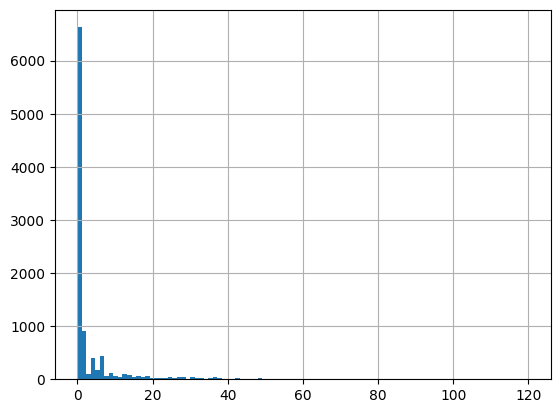

In [ ]:
df_merged.loc[df_merged["distancia_nombres"] < 9999, "distancia_nombres"].hist(bins=100)

Fijémonos en los casos donde la distancia es mayor a 0 (es decir, existen diferencias)

<Axes: >

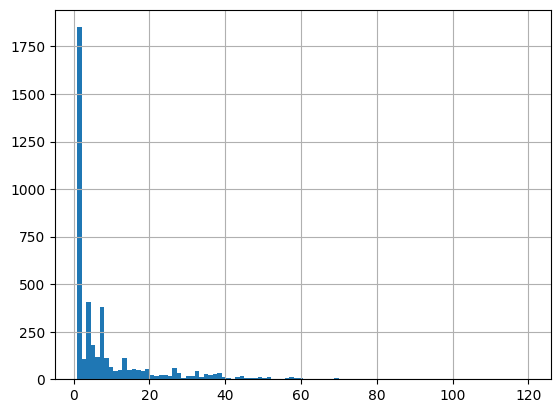

In [ ]:
df_merged.loc[(df_merged["distancia_nombres"] > 0) &
              (df_merged["distancia_nombres"] < 9999), "distancia_nombres"].hist(bins=100)

Son muchos casos. Pero enfoquémonos ahora sólo en los que tienen `tipo_institucion_final` _Institución de Educación Superior_

In [ ]:
df_merged.loc[(df_merged["distancia_nombres"] > 0) &
              (df_merged["tipo_institucion_final"] == "Institución de Educación Superior"),
              ["rut_dv", "nombre_normalizado", "nombre_canonico", "distancia_nombres"]]

,rut_dv,nombre_normalizado,nombre_canonico,distancia_nombres
25,71647500-k,UNIVERSIDAD BERNARDO O'HIGGINS,UNIVERSIDAD BERNARDO OHIGGINS,1
28,60910000-1,CENTRO DE ENERGIA UNIVERSIDAD DE CHILE,UNIVERSIDAD DE CHILE,18
36,60910000-1,FACULTAD DE CIENCIAS AGRONOMICAS U DE CHILE,UNIVERSIDAD DE CHILE,28
60,81698900-0,PONTIFICIA UNIVERSIDAD CATOLICA DE CHILE- FAIF,PONTIFICIA UNIVERSIDAD CATOLICA DE CHILE,6
67,71540100-2,UNIVERSIDAD ANDRES BELLO,UNIVERSIDAD NACIONAL ANDRES BELLO,9
...,...,...,...,...
8894,71704700-1,UNIVERSIDAD DEL PACIFICO,UNIVERSIDAD DEL PACIFICO EN LIQUIDACION,15
8902,96635520-4,INSTITUTO PROFESIONAL LA ARAUCANA S A,INSTITUTO PROFESIONAL LA ARAUCANA SPA,1
8943,71540100-2,UNIVERSIDAD ANDRES BELLO,UNIVERSIDAD NACIONAL ANDRES BELLO,9
9012,71704700-1,UNIVERSIDAD DEL PACIFICO,UNIVERSIDAD DEL PACIFICO EN LIQUIDACION,15


Se podría hacer trabajo manual, intentando separar centos de universidades, pero por ahora lo dejaremos para más adelante.

### Un nombre por RUT

In [ ]:
grouped_rut = df_merged.groupby(["rut_dv"], as_index=False).agg({"nombre_canonico": set})
grouped_rut[grouped_rut["nombre_canonico"].str.len() != 1]

,rut_dv,nombre_canonico


Todos los RUTs sólo tienen un nombre canónico

### Un RUT por nombre

In [ ]:
grouped_name = df_merged.groupby(["nombre_canonico"], as_index=False).agg({"rut_dv": set})
grouped_name[grouped_name["rut_dv"].str.len() != 1]

,nombre_canonico,rut_dv
636,BAU SPA,"{96893990-4, 76602815-2}"
3624,PLAYA LARGA SPA,"{77152659-4, 76967146-3}"


Hay dos instituciones que tienen más de un RUT asociado. Veamos Bau Spa.

In [ ]:
df_merged.loc[df_merged["nombre_canonico"] == "BAU SPA",
              ["nombre_normalizado", "nombre_canonico", "rut_dv"]]

,nombre_normalizado,nombre_canonico,rut_dv
1984,BAU SPA,BAU SPA,76602815-2
7665,INDUSTRIAL Y COMERCIAL BAU SA,BAU SPA,96893990-4


De acuerdo a PortalChile, son dos empresas distintas. Les cambiaremos el nombre para desambiguar.

In [ ]:
df_merged.loc[df_merged["rut_dv"] == "76602815-2", "nombre_canonico"] = "BAU SPA"
df_merged.loc[df_merged["rut_dv"] == "96893990-4", "nombre_canonico"] = "INDUSTRIAL Y COMERCIAL BAU S.A."
df_merged.loc[df_merged["rut_dv"].isin(["76602815-2", "96893990-4"])]

,Unnamed: 0,id,año_adjudicacion,codigo,instrumento,tipo_relacion,titulo_del_proyecto,rutdv,nombre_razon_social,tipo_ctr_sii,...,nombre_normalizado,rut,rut_dv,nombre_canonico,empresa_tipo,empresa_subtipo,provincia,comuna,tipo_institucion_final,distancia_nombres
1984,1984,1985,2021.0,21SN-182398,Súmate a innovar Reactívate,BENEFICIARIO / DESARROLLADOR,ITOHUB: Sistema información centralizada para ...,76602815-2,BAU SpA,PERSONA JURIDICA COMERCIAL,...,BAU SPA,76602815,76602815-2,BAU SPA,PERSONA JURIDICA COMERCIAL,SOCIEDAD POR ACCIONES,SANTIAGO,VITACURA,Empresa,0
7665,7665,7666,2015.0,15VIP-44024,Programa De Vinculacion Empresa - Entidades Pr...,BENEFICIARIO / DESARROLLADOR,recubrimiento antimicrobiano para las paredes ...,96893990-4,INDUSTRIAL Y COMERCIAL BAU S.A.,PERSONA JURIDICA COMERCIAL,...,INDUSTRIAL Y COMERCIAL BAU SA,96893990,96893990-4,INDUSTRIAL Y COMERCIAL BAU S.A.,PERSONA JURIDICA COMERCIAL,SOCIEDAD POR ACCIONES,CHACABUCO,COLINA,Empresa,24


Veamos ahora Playa Larga Spa. Según Portal Chile, también son instituciones distintas.

In [ ]:
df_merged.loc[df_merged["rut_dv"] == "76967146-3", "nombre_canonico"] = "PLAYA LARGA SPA"
df_merged.loc[df_merged["rut_dv"] == "77152659-4", "nombre_canonico"] = "PLAYA LARGA SPA (PLARGA)"
df_merged.loc[df_merged["rut_dv"].isin(("77152659-4", "76967146-3"))]

,Unnamed: 0,id,año_adjudicacion,codigo,instrumento,tipo_relacion,titulo_del_proyecto,rutdv,nombre_razon_social,tipo_ctr_sii,...,nombre_normalizado,rut,rut_dv,nombre_canonico,empresa_tipo,empresa_subtipo,provincia,comuna,tipo_institucion_final,distancia_nombres
1276,1276,1277,2021.0,21CV-171598,Crea y Valida RI,BENEFICIARIO / DESARROLLADOR,VALIDACIÓN TÉCNICA Y COMERCIAL DE CRIOANOXIA M...,77152659-4,PLAYA LARGA SpA (PLARGA),PERSONA JURIDICA COMERCIAL,...,PLAYA LARGA SPA (PLARGA),77152659,77152659-4,PLAYA LARGA SPA (PLARGA),PERSONA JURIDICA COMERCIAL,SOCIEDAD POR ACCIONES,MARGA MARGA,QUILPUE,Empresa,10
3558,3558,3559,2019.0,19SN-107056,Súmate a Innovar,BENEFICIARIO / DESARROLLADOR,bigbean: envase capsular autodegradables,76967146-3,PLAYA LARGA SPA,PERSONA JURIDICA COMERCIAL,...,PLAYA LARGA SPA,76967146,76967146-3,PLAYA LARGA SPA,PERSONA JURIDICA COMERCIAL,SOCIEDAD POR ACCIONES,SANTIAGO,LO BARNECHEA,Empresa,0


### Añadir nombres faltantes

#### `nombre_normalizado`

In [ ]:
df_merged[df_merged["nombre_normalizado"].isnull()]

,Unnamed: 0,id,año_adjudicacion,codigo,instrumento,tipo_relacion,titulo_del_proyecto,rutdv,nombre_razon_social,tipo_ctr_sii,...,nombre_normalizado,rut,rut_dv,nombre_canonico,empresa_tipo,empresa_subtipo,provincia,comuna,tipo_institucion_final,distancia_nombres
434,434,435,2022.0,21SN2-200546,Súmate a innovar,ENTIDAD COLABORADORA,Biocontrolador para el cáncer bacteriano del c...,13634523-0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9999
9746,9746,521,NaN,PI-2417,Ley I+D,mandante,Desarrollo de una estación ERNC mixta Solar-Eó...,7029130-4,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9999
10410,10410,1187,NaN,PI-527,Ley I+D,mandante,Obtención de variedades de Lupino (Lupinus Alb...,4255641-6,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9999
10459,10459,1236,NaN,PI-64569,Ley I+D,mandante,Desarrollo de cultivos de microorganismos cerv...,10308090-8,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9999


Son 4 filas, y no hay nada que hacer en esos casos. Simplemente, pondremos un string vacío en `nombre_normalizado`.

In [ ]:
df_merged.loc[df_merged["nombre_normalizado"].isnull(), "nombre_normalizado"] = ""
df_merged.loc[df_merged["nombre_normalizado"].isnull()]

,Unnamed: 0,id,año_adjudicacion,codigo,instrumento,tipo_relacion,titulo_del_proyecto,rutdv,nombre_razon_social,tipo_ctr_sii,...,nombre_normalizado,rut,rut_dv,nombre_canonico,empresa_tipo,empresa_subtipo,provincia,comuna,tipo_institucion_final,distancia_nombres


#### `nombre_canonico`

In [ ]:
df_merged[df_merged["nombre_canonico"].isnull()]

,Unnamed: 0,id,año_adjudicacion,codigo,instrumento,tipo_relacion,titulo_del_proyecto,rutdv,nombre_razon_social,tipo_ctr_sii,...,nombre_normalizado,rut,rut_dv,nombre_canonico,empresa_tipo,empresa_subtipo,provincia,comuna,tipo_institucion_final,distancia_nombres
68,68,69,2023.0,23CVC-245689,Crea y Valida I+D+i Colaborativo,ENTIDAD COLABORADORA,Pretratamiento de celdas solares fotovoltaicas...,8823705-6,Manuel Ricardo San Martin Valdivia,NaN,...,MANUEL RICARDO SAN MARTIN VALDIVIA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9999
187,187,188,2023.0,23EURE-245956,Crea y Valida Eureka,ENTIDAD COLABORADORA,Desarrollo y evaluación de un proceso para la ...,NaN,Universidad de Vigo,NaN,...,UNIVERSIDAD DE VIGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9999
188,188,189,2023.0,23EURE-245956,Crea y Valida Eureka,ENTIDAD COLABORADORA,Desarrollo y evaluación de un proceso para la ...,NaN,ARTICA INGENIERÍA E INNOVACIÓN S.L.,NaN,...,ARTICA INGENIERIA E INNOVACION SL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9999
196,196,197,2023.0,23IAT-246199,Alta tecnología,ASOCIADO,Escalamiento y validación del proceso de recup...,NaN,"Ecometales Limited, Agencia en Chile",SOCIEDADES EXTRANJERAS,...,"ECOMETALES LIMITED, AGENCIA EN CHILE",NaN,NaN,NaN,NaN,NaN,NaN,NaN,Internacional,9999
206,206,207,2023.0,23IR-246344,Innova Región,BENEFICIARIO / DESARROLLADOR,Agua cervecera,77344475-7,Cervecería Rural SpA,NaN,...,CERVECERIA RURAL SPA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9224,9224,9225,2012.0,12SUP-15968,Startup (I),BENEFICIARIO / DESARROLLADOR,rhyboo s.a,21651777-6,JORGE ALBERTO RODRIGUEZ SUAREZ,NaN,...,JORGE ALBERTO RODRIGUEZ SUAREZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9999
9225,9225,9226,2012.0,12SUP-15979,Startup (I),BENEFICIARIO / DESARROLLADOR,bcn school,14533316-4,FELIPE IGNACIO OLIVA LAZZERINI,NaN,...,FELIPE IGNACIO OLIVA LAZZERINI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9999
9746,9746,521,NaN,PI-2417,Ley I+D,mandante,Desarrollo de una estación ERNC mixta Solar-Eó...,7029130-4,NaN,NaN,...,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9999
10410,10410,1187,NaN,PI-527,Ley I+D,mandante,Obtención de variedades de Lupino (Lupinus Alb...,4255641-6,NaN,NaN,...,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9999


636 filas. Para todos estos casos, pondremos `nombre_canonico` igual a `nombre_normalizado`, el cual ya no puede ser nulo (por el arreglo que acabamos de hacer)

In [ ]:
idx_null = df_merged["nombre_canonico"].isnull() # We save this index in order to use it later, after we apply the changes
df_merged.loc[df_merged["nombre_canonico"].isnull(), "nombre_canonico"] = df_merged.loc[df_merged["nombre_canonico"].isnull(), "nombre_normalizado"]
df_merged[idx_null]

,Unnamed: 0,id,año_adjudicacion,codigo,instrumento,tipo_relacion,titulo_del_proyecto,rutdv,nombre_razon_social,tipo_ctr_sii,...,nombre_normalizado,rut,rut_dv,nombre_canonico,empresa_tipo,empresa_subtipo,provincia,comuna,tipo_institucion_final,distancia_nombres
68,68,69,2023.0,23CVC-245689,Crea y Valida I+D+i Colaborativo,ENTIDAD COLABORADORA,Pretratamiento de celdas solares fotovoltaicas...,8823705-6,Manuel Ricardo San Martin Valdivia,NaN,...,MANUEL RICARDO SAN MARTIN VALDIVIA,NaN,NaN,MANUEL RICARDO SAN MARTIN VALDIVIA,NaN,NaN,NaN,NaN,NaN,9999
187,187,188,2023.0,23EURE-245956,Crea y Valida Eureka,ENTIDAD COLABORADORA,Desarrollo y evaluación de un proceso para la ...,NaN,Universidad de Vigo,NaN,...,UNIVERSIDAD DE VIGO,NaN,NaN,UNIVERSIDAD DE VIGO,NaN,NaN,NaN,NaN,NaN,9999
188,188,189,2023.0,23EURE-245956,Crea y Valida Eureka,ENTIDAD COLABORADORA,Desarrollo y evaluación de un proceso para la ...,NaN,ARTICA INGENIERÍA E INNOVACIÓN S.L.,NaN,...,ARTICA INGENIERIA E INNOVACION SL,NaN,NaN,ARTICA INGENIERIA E INNOVACION SL,NaN,NaN,NaN,NaN,NaN,9999
196,196,197,2023.0,23IAT-246199,Alta tecnología,ASOCIADO,Escalamiento y validación del proceso de recup...,NaN,"Ecometales Limited, Agencia en Chile",SOCIEDADES EXTRANJERAS,...,"ECOMETALES LIMITED, AGENCIA EN CHILE",NaN,NaN,"ECOMETALES LIMITED, AGENCIA EN CHILE",NaN,NaN,NaN,NaN,Internacional,9999
206,206,207,2023.0,23IR-246344,Innova Región,BENEFICIARIO / DESARROLLADOR,Agua cervecera,77344475-7,Cervecería Rural SpA,NaN,...,CERVECERIA RURAL SPA,NaN,NaN,CERVECERIA RURAL SPA,NaN,NaN,NaN,NaN,NaN,9999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9224,9224,9225,2012.0,12SUP-15968,Startup (I),BENEFICIARIO / DESARROLLADOR,rhyboo s.a,21651777-6,JORGE ALBERTO RODRIGUEZ SUAREZ,NaN,...,JORGE ALBERTO RODRIGUEZ SUAREZ,NaN,NaN,JORGE ALBERTO RODRIGUEZ SUAREZ,NaN,NaN,NaN,NaN,NaN,9999
9225,9225,9226,2012.0,12SUP-15979,Startup (I),BENEFICIARIO / DESARROLLADOR,bcn school,14533316-4,FELIPE IGNACIO OLIVA LAZZERINI,NaN,...,FELIPE IGNACIO OLIVA LAZZERINI,NaN,NaN,FELIPE IGNACIO OLIVA LAZZERINI,NaN,NaN,NaN,NaN,NaN,9999
9746,9746,521,NaN,PI-2417,Ley I+D,mandante,Desarrollo de una estación ERNC mixta Solar-Eó...,7029130-4,NaN,NaN,...,,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,9999
10410,10410,1187,NaN,PI-527,Ley I+D,mandante,Obtención de variedades de Lupino (Lupinus Alb...,4255641-6,NaN,NaN,...,,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,9999


In [ ]:
df_merged[df_merged["nombre_canonico"].isnull()]


,Unnamed: 0,id,año_adjudicacion,codigo,instrumento,tipo_relacion,titulo_del_proyecto,rutdv,nombre_razon_social,tipo_ctr_sii,...,nombre_normalizado,rut,rut_dv,nombre_canonico,empresa_tipo,empresa_subtipo,provincia,comuna,tipo_institucion_final,distancia_nombres


## Guardar

In [ ]:
df_merged.columns

Index(['Unnamed: 0', 'id', 'año_adjudicacion', 'codigo', 'instrumento',
       'tipo_relacion', 'titulo_del_proyecto', 'rutdv', 'nombre_razon_social',
       'tipo_ctr_sii', 'rubro_sii', 'aprobado_corfo', 'aprobado_privado_total',
       'aprobado_privado_pecuniario', 'monto_consolidado_ley',
       'rut_normalizado', 'rut_valido', 'nombre_normalizado', 'rut', 'rut_dv',
       'nombre_canonico', 'empresa_tipo', 'empresa_subtipo', 'provincia',
       'comuna', 'tipo_institucion_final', 'distancia_nombres'],
      dtype='object')

In [ ]:
df_merged = df_merged.drop(columns=["Unnamed: 0", "rut", "rut_normalizado", "distancia_nombres"], errors="ignore")
df_merged

,id,año_adjudicacion,codigo,instrumento,tipo_relacion,titulo_del_proyecto,rutdv,nombre_razon_social,tipo_ctr_sii,rubro_sii,...,monto_consolidado_ley,rut_valido,nombre_normalizado,rut_dv,nombre_canonico,empresa_tipo,empresa_subtipo,provincia,comuna,tipo_institucion_final
0,1,2023.0,23CH-246113,Capital Humano,BENEFICIARIO / DESARROLLADOR,Nuevas estrategias de microencapsulación para ...,77131055-9,Liva Company SPA,PERSONA JURIDICA COMERCIAL,COMERCIO AL POR MAYOR Y AL POR MENOR; REPARACI...,...,NaN,True,LIVA COMPANY SPA,77131055-9,LIVA COMPANY SPA,PERSONA JURIDICA COMERCIAL,SOCIEDAD POR ACCIONES,SANTIAGO,SANTIAGO,Empresa
1,2,2023.0,23CH-246116,Capital Humano,BENEFICIARIO / DESARROLLADOR,Aprender haciendo bakeries de bajo índice glic...,77208333-5,ELAB. Y COM. CASONA EL MONTE LTDA,PERSONA JURIDICA COMERCIAL,INDUSTRIA MANUFACTURERA,...,NaN,True,ELAB Y COM CASONA EL MONTE LTDA,77208333-5,ELABORADORA Y COMERCIALIZADORA CASONA EL MONTE...,PERSONA JURIDICA COMERCIAL,SOC. RESPONSABILIDAD LIMITADA,TALAGANTE,EL MONTE,Empresa
2,3,2023.0,23CH-246118,Capital Humano,BENEFICIARIO / DESARROLLADOR,Optimización de medios de cultivo sustentables...,77148405-0,LUYEF BIOTECHNOLOGIES CHILE SPA,PERSONA JURIDICA COMERCIAL,"ACTIVIDADES PROFESIONALES, CIENTIFICAS Y TECNICAS",...,NaN,True,LUYEF BIOTECHNOLOGIES CHILE SPA,77148405-0,LUYEF BIOTECHNOLOGIES CHILE SPA,PERSONA JURIDICA COMERCIAL,SOCIEDAD POR ACCIONES,SANTIAGO,PROVIDENCIA,Empresa
3,4,2023.0,23CH-246123,Capital Humano,BENEFICIARIO / DESARROLLADOR,Producción de proteínas recombinantes a partir...,77065948-5,Pewman Innovation spa,PERSONA JURIDICA COMERCIAL,"AGRICULTURA, GANADERIA, SILVICULTURA Y PESCA",...,NaN,True,PEWMAN INNOVATION SPA,77065948-5,PEWMAN INNOVATION SPA,PERSONA JURIDICA COMERCIAL,SOCIEDAD POR ACCIONES,CHACABUCO,LAS CONDES,Empresa
4,5,2023.0,23CH-246125,Capital Humano,BENEFICIARIO / DESARROLLADOR,NGB-eDNA. Plataforma genética no-invasiva para...,77063937-9,Ecología y Genética Ambiental SpA,PERSONA JURIDICA COMERCIAL,"ACTIVIDADES PROFESIONALES, CIENTIFICAS Y TECNICAS",...,NaN,True,ECOLOGIA Y GENETICA AMBIENTAL SPA,77063937-9,ECOLOGIA Y GENETICA AMBIENTAL SPA,PERSONA JURIDICA COMERCIAL,SOCIEDAD POR ACCIONES,CONCEPCIÓN,CONCEPCION,Empresa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10566,1344,NaN,PI-998,Ley I+D,mandante,Eficacia y toxicidad del uso de una familia de...,77424780-7,EWOS CHILE ALIMENTOS LIMITADA,PERSONA JURIDICA COMERCIAL,D - INDUSTRIAS MANUFACTURERAS NO METALICAS,...,76835703.0,True,EWOS CHILE ALIMENTOS LIMITADA,77424780-7,EWOS CHILE ALIMENTOS LIMITADA,PERSONA JURIDICA COMERCIAL,SOC. RESPONSABILIDAD LIMITADA,CONCEPCIÓN,CORONEL,Empresa
10567,1345,NaN,PI-99869,Ley I+D,mandante,Análisis Proteómico por Machine-Learning: Perf...,76221912-3,LABORATORIO PATHOVET LIMITADA,PERSONA JURIDICA COMERCIAL,O - SERVICIOS SOCIALES Y DE SALUD,...,23076375.0,True,LABORATORIO PATHOVET LIMITADA,76221912-3,LABORATORIO PATHOVET LIMITADA,PERSONA JURIDICA COMERCIAL,SOC. RESPONSABILIDAD LIMITADA,LLANQUIHUE,PUERTO MONTT,Empresa
10568,1346,NaN,PI-99871,Ley I+D,mandante,Desarrollo de un proceso de recubrimiento o lí...,76082953-6,NANOTEC S.A.,PERSONA JURIDICA COMERCIAL,"H - COMERCIO AL POR MAYOR Y MENOR, REP. VEH.AU...",...,19770000.0,True,NANOTEC SA,76082953-6,NANOTEC S.A.,PERSONA JURIDICA COMERCIAL,SOCIEDADES ANONIMAS CERRADAS,SANTIAGO,SAN BERNARDO,Empresa
10569,1347,NaN,PI-99872,Ley I+D,mandante,Nuevos usos de nanopartículas metálicas: Desar...,76082953-6,NANOTEC S.A.,PERSONA JURIDICA COMERCIAL,"H - COMERCIO AL POR MAYOR Y MENOR, REP. VEH.AU...",...,19800000.0,True,NANOTEC SA,76082953-6,NANOTEC S.A.,PERSONA JURIDICA COMERCIAL,SOCIEDADES ANONIMAS CERRADAS,SANTIAGO,SAN BERNARDO,Empresa


In [ ]:
df_merged.columns

Index(['id', 'año_adjudicacion', 'codigo', 'instrumento', 'tipo_relacion',
       'titulo_del_proyecto', 'rutdv', 'nombre_razon_social', 'tipo_ctr_sii',
       'rubro_sii', 'aprobado_corfo', 'aprobado_privado_total',
       'aprobado_privado_pecuniario', 'monto_consolidado_ley', 'rut_valido',
       'nombre_normalizado', 'rut_dv', 'nombre_canonico', 'empresa_tipo',
       'empresa_subtipo', 'provincia', 'comuna', 'tipo_institucion_final'],
      dtype='object')

In [ ]:
df_merged.to_excel(os.path.join(results_dir, "data_corfo_casi_final.xlsx"))